In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random as rn

from scipy import stats

seed = 42
import warnings
warnings.filterwarnings('ignore')


%matplotlib inline

In [2]:
df=pd.read_csv("House_Rent_Dataset.csv")
df.head()
dff=df.copy()

In [3]:
df["Bathroom"].value_counts()

Bathroom
2     2291
1     1474
3      749
4      156
5       60
6       12
7        3
10       1
Name: count, dtype: int64

<Axes: xlabel='Size', ylabel='Rent'>

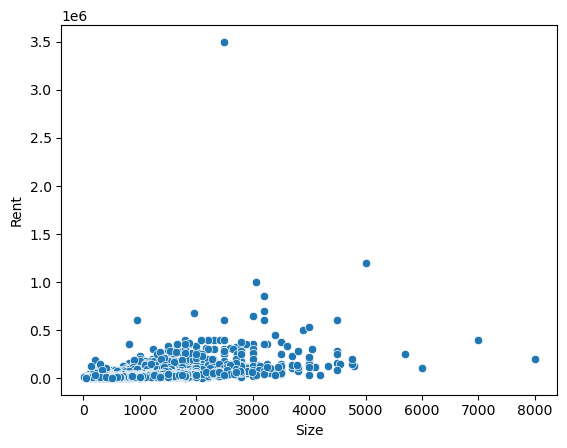

In [4]:
sns.scatterplot(x="Size",y="Rent",data=df)
#This plots shows us that there is an outlier

In [5]:
df["Total no of floors"]=df["Floor"].apply(lambda x: x.split("of")[-1])
df["Total no of floors"]=df["Total no of floors"].apply(lambda x:x.replace("Ground","0"))
df["Total no of floors"]=df["Total no of floors"].apply(lambda x: int(x))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Posted On           4746 non-null   object
 1   BHK                 4746 non-null   int64 
 2   Rent                4746 non-null   int64 
 3   Size                4746 non-null   int64 
 4   Floor               4746 non-null   object
 5   Area Type           4746 non-null   object
 6   Area Locality       4746 non-null   object
 7   City                4746 non-null   object
 8   Furnishing Status   4746 non-null   object
 9   Tenant Preferred    4746 non-null   object
 10  Bathroom            4746 non-null   int64 
 11  Point of Contact    4746 non-null   object
 12  Total no of floors  4746 non-null   int64 
dtypes: int64(5), object(8)
memory usage: 482.1+ KB


In [6]:
df["Floor"].unique()

array(['Ground out of 2', '1 out of 3', '1 out of 2', 'Ground out of 1',
       'Ground out of 4', '1 out of 4', '1 out of 1', 'Ground out of 3',
       '2 out of 3', '4 out of 5', '2 out of 2', '2 out of 5',
       '4 out of 14', '3 out of 3', '5 out of 5', '4 out of 4',
       '7 out of 8', '2 out of 4', '3 out of 4', '1 out of 5',
       '8 out of 5', 'Ground out of 6', '2 out of 1',
       'Upper Basement out of 4', 'Ground out of 5', '3 out of 5',
       '11 out of 19', '5 out of 10', '11 out of 14',
       'Lower Basement out of 2', '2 out of 7', '4 out of 10',
       '7 out of 10', '2 out of 13', '6 out of 7', '4 out of 7',
       '14 out of 14', '43 out of 78', '2 out of 8', '13 out of 18',
       '5 out of 12', '18 out of 24', '3 out of 7', '17 out of 31',
       '11 out of 21', '7 out of 19', '14 out of 23', '9 out of 20',
       'Upper Basement out of 9', '19 out of 24', '3 out of 21',
       '1 out of 22', '8 out of 8', '6 out of 12', '4 out of 58',
       'Upper Basement o

In [7]:
df["Floor_on"]=df["Floor"].apply(lambda x:x.split("out")[0])
df["Floor_on"].unique()

array(['Ground ', '1 ', '2 ', '4 ', '3 ', '5 ', '7 ', '8 ',
       'Upper Basement ', '11 ', 'Lower Basement ', '6 ', '14 ', '43 ',
       '13 ', '18 ', '17 ', '9 ', '19 ', '60 ', '34 ', '12 ', '26 ',
       '25 ', '53 ', '16 ', '10 ', '39 ', '32 ', '47 ', '28 ', '20 ',
       '15 ', '65 ', '40 ', '37 ', '22 ', '21 ', '30 ', '35 ', '33 ',
       '44 ', '41 ', '46 ', '27 ', '45 ', '48 ', '50 ', '24 ', '23 ',
       '29 ', '49 ', '36 ', '76 ', '3', 'Ground', '1'], dtype=object)

In [8]:
def info_about_dataset():
    print(df.info())
    print(90* "*")
    print(df.describe())
info_about_dataset()   #There are no missing values in the columns 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Posted On           4746 non-null   object
 1   BHK                 4746 non-null   int64 
 2   Rent                4746 non-null   int64 
 3   Size                4746 non-null   int64 
 4   Floor               4746 non-null   object
 5   Area Type           4746 non-null   object
 6   Area Locality       4746 non-null   object
 7   City                4746 non-null   object
 8   Furnishing Status   4746 non-null   object
 9   Tenant Preferred    4746 non-null   object
 10  Bathroom            4746 non-null   int64 
 11  Point of Contact    4746 non-null   object
 12  Total no of floors  4746 non-null   int64 
 13  Floor_on            4746 non-null   object
dtypes: int64(5), object(9)
memory usage: 519.2+ KB
None
********************************************************************

In [9]:
#checking duplicates
df.duplicated().sum()#There are no missing vales

0

In [10]:
for cols in df.columns:
    print(f'There {df[cols].nunique()} distint Values in "{cols}" Column')

There 81 distint Values in "Posted On" Column
There 6 distint Values in "BHK" Column
There 243 distint Values in "Rent" Column
There 615 distint Values in "Size" Column
There 480 distint Values in "Floor" Column
There 3 distint Values in "Area Type" Column
There 2235 distint Values in "Area Locality" Column
There 6 distint Values in "City" Column
There 3 distint Values in "Furnishing Status" Column
There 3 distint Values in "Tenant Preferred" Column
There 8 distint Values in "Bathroom" Column
There 3 distint Values in "Point of Contact" Column
There 67 distint Values in "Total no of floors" Column
There 57 distint Values in "Floor_on" Column


In [11]:
#let's explore the columns individually
df["Furnishing Status"].value_counts()

Furnishing Status
Semi-Furnished    2251
Unfurnished       1815
Furnished          680
Name: count, dtype: int64

In [12]:
df["Posted On"]=pd.to_datetime(df["Posted On"])
df["Day of Week"] = df["Posted On"].dt.day_name()
df["Month"] = df["Posted On"].dt.month_name()
df.head()

Posted On  BHK   Rent  Size            Floor    Area Type  \
0 2022-05-18    2  10000  1100  Ground out of 2   Super Area   
1 2022-05-13    2  20000   800       1 out of 3   Super Area   
2 2022-05-16    2  17000  1000       1 out of 3   Super Area   
3 2022-07-04    2  10000   800       1 out of 2   Super Area   
4 2022-05-09    2   7500   850       1 out of 2  Carpet Area   

              Area Locality     City Furnishing Status  Tenant Preferred  \
0                    Bandel  Kolkata       Unfurnished  Bachelors/Family   
1  Phool Bagan, Kankurgachi  Kolkata    Semi-Furnished  Bachelors/Family   
2   Salt Lake City Sector 2  Kolkata    Semi-Furnished  Bachelors/Family   
3               Dumdum Park  Kolkata       Unfurnished  Bachelors/Family   
4             South Dum Dum  Kolkata       Unfurnished         Bachelors   

   Bathroom Point of Contact  Total no of floors Floor_on Day of Week Month  
0         2    Contact Owner                   2  Ground    Wednesday   May  
1         1    Contact Owner                   3       1       Friday   May  
2         1    Contact Owner                   3       1       Monday   May  
3         1    Contact Owner                   2       1       Monday  July  
4         1    Contact Owner                   2       1       Monday   May

In [13]:
df["City"].nunique()

6

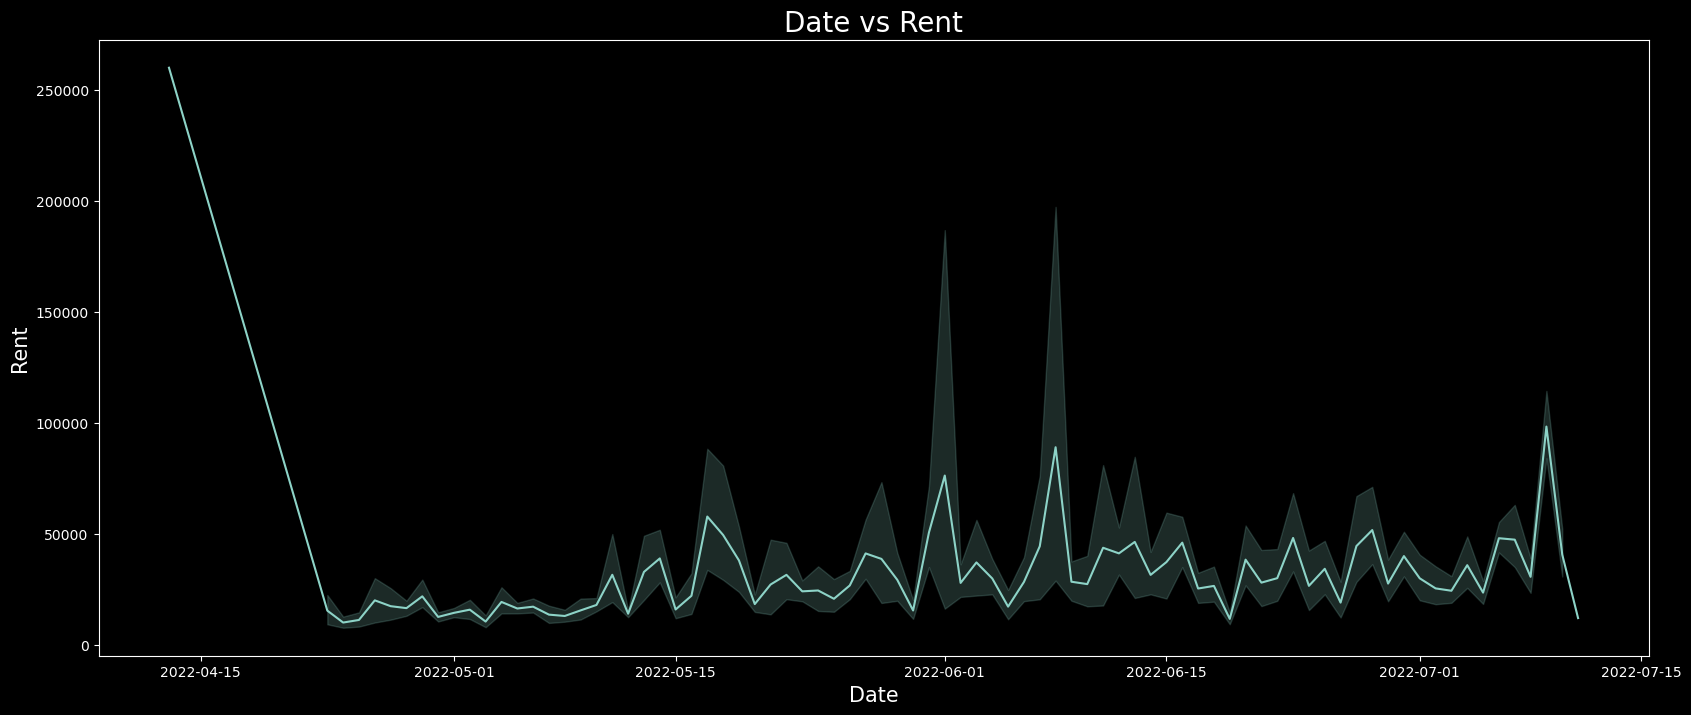

In [14]:
cols=["Posted On"]
for col in cols:
    plt.style.use('dark_background')
    plt.figure(figsize=(20,8))
    sns.lineplot(data=df,x=col,y='Rent',palette='coolwarm',markers="*")
    plt.title('Date vs Rent',fontsize=20)
    plt.xlabel('Date',fontsize=15)
    plt.ylabel('Rent',fontsize=15)
    plt.show()#July had the most increase in Rent

# MONTHS

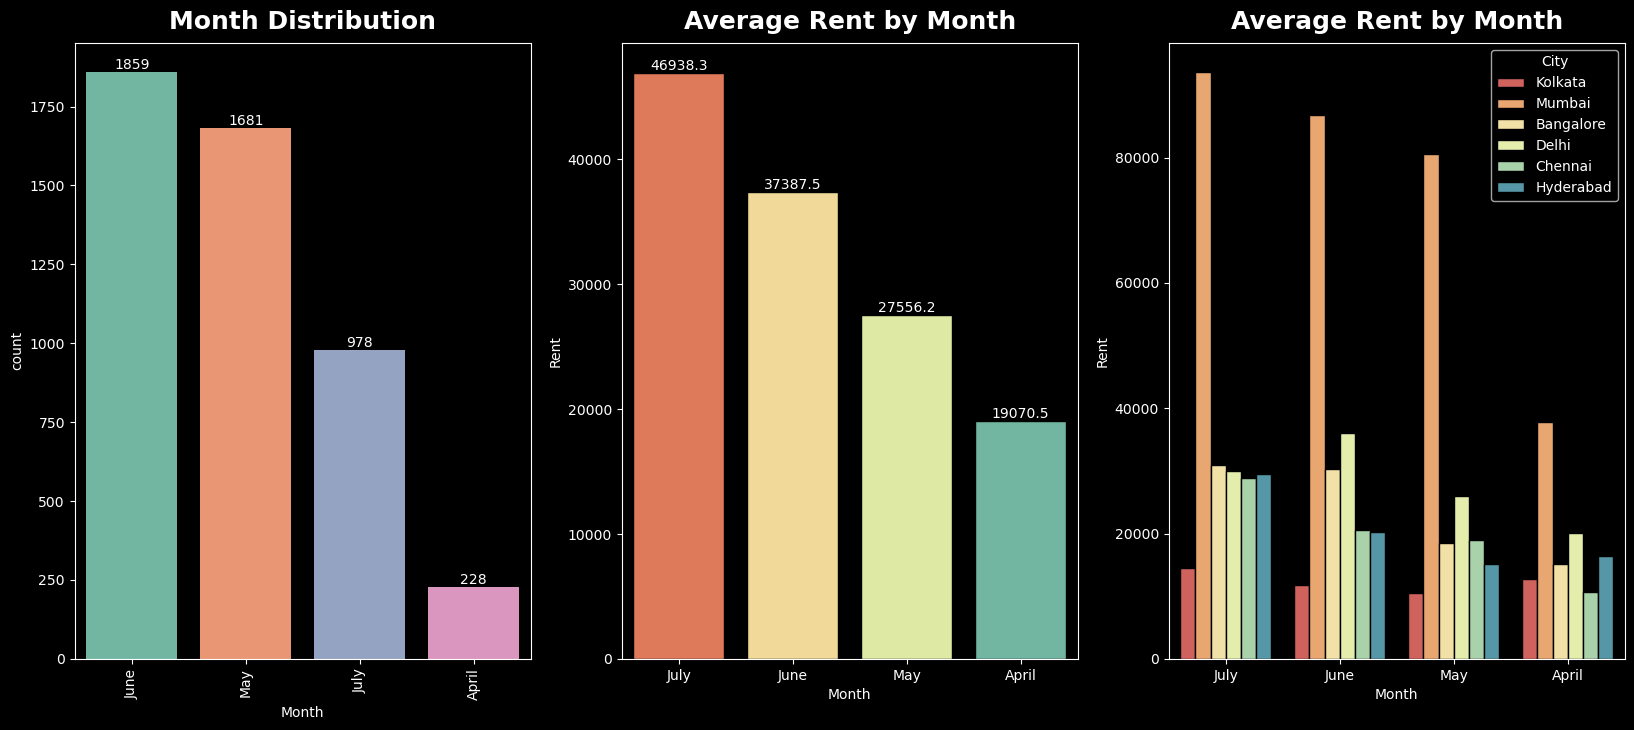

In [15]:
def categorical_visualization(cols):
    plt.figure(figsize=(20,8))
    plt.subplot(1,3,1)
    ax=sns.countplot(x=cols,data=df,palette="Set2",order=df[cols].value_counts().index)
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
    ax.bar_label(ax.containers[0])
    plt.title(f"{cols} Distribution",pad=10,fontweight="black",fontsize=18)
    plt.xticks(rotation=90)

  
    
    plt.subplot(1,3,2)
    df[cols].value_counts()
    cols_list = df.groupby(cols)["Rent"].mean().sort_values(ascending=False).index[0:].tolist()
    ax=sns.barplot(x = cols, y = 'Rent', data = df[df[cols].isin(cols_list)],
                    order = cols_list, 
                    palette = 'Spectral', 
                    ci = False,
                    edgecolor = "black")
    plt.xticks(rotation = 0);
    ax.bar_label(ax.containers[0])
    plt.title('Average Rent by Month',pad=10,fontweight="black",fontsize=18)
    





    
    plt.subplot(1,3,3)
    plt.style.use('dark_background')
    df[cols].value_counts()
    cols_list = df.groupby(cols)["Rent"].mean().sort_values(ascending=False).index[0:].tolist()
    ax=sns.barplot(x = cols, y = 'Rent', data = df[df[cols].isin(cols_list)],
                    order = cols_list, 
                    palette = 'Spectral', 
                    ci = False,
                   hue="City",
                    edgecolor = "black")
    plt.xticks(rotation = 0);
    #ax.bar_label(ax.containers[0])
    plt.title('Average Rent by Month',pad=10,fontweight="black",fontsize=18)
    plt.show()

categorical_visualization("Month")

# BHK =Bedroom Hall ad Kitchen

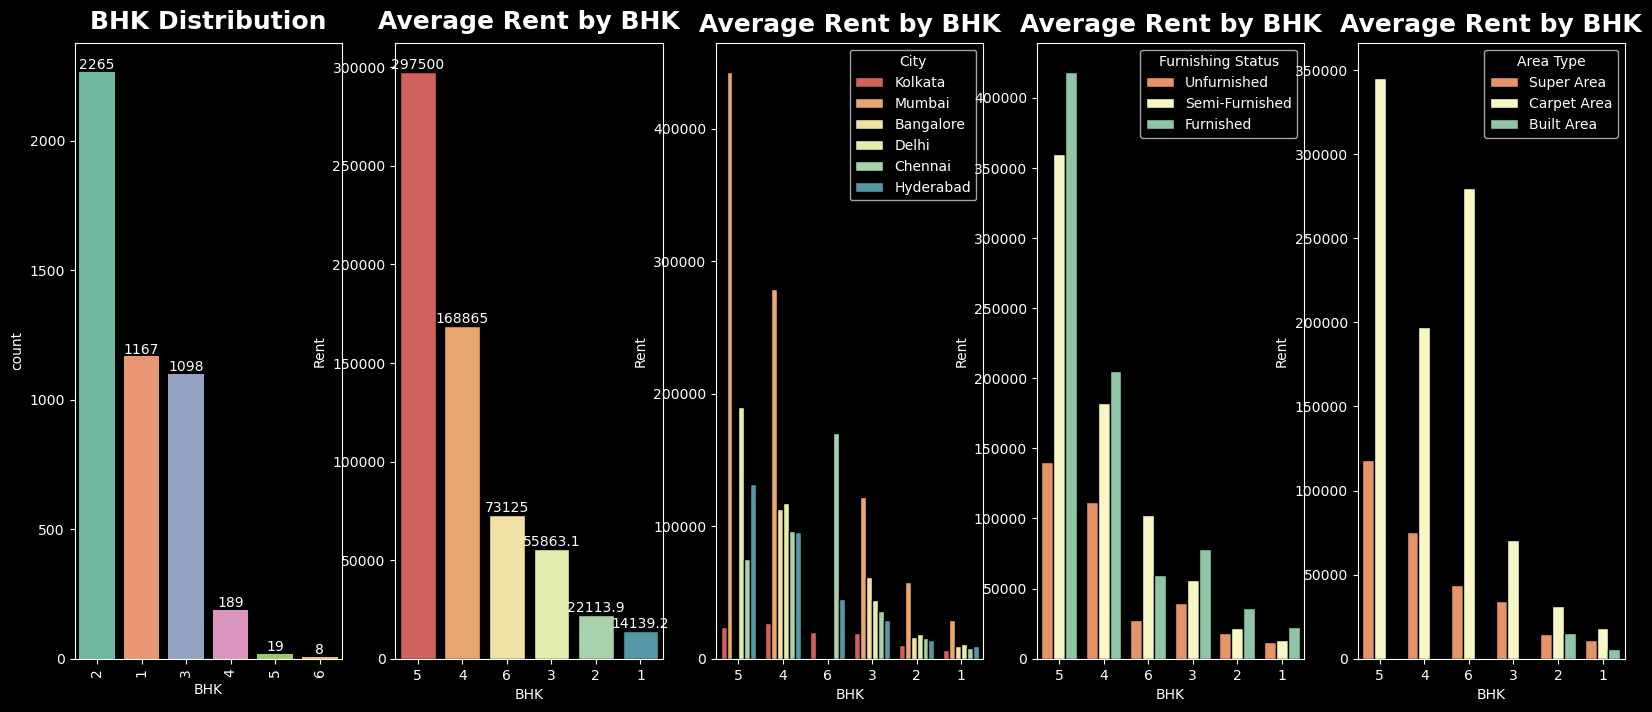

In [16]:
def categorical_visualization(cols):
    plt.figure(figsize=(20,8))
    plt.subplot(1,5,1)
    ax=sns.countplot(x=cols,data=df,palette="Set2",order=df[cols].value_counts().index)
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
    ax.bar_label(ax.containers[0])
    plt.title(f"{cols} Distribution",pad=10,fontweight="black",fontsize=18)
    plt.xticks(rotation=90)

  
    
    plt.subplot(1,5,2)
    df[cols].value_counts()
    cols_list = df.groupby(cols)["Rent"].mean().sort_values(ascending=False).index[0:].tolist()
    cols_list_sorted = sorted(cols_list)
    ax=sns.barplot(x = cols, y = 'Rent', data = df[df[cols].isin(cols_list)],
                    order = cols_list, 
                    palette = 'Spectral', 
                    ci = False,
                    edgecolor = "black")
    plt.xticks(rotation = 0);
    ax.bar_label(ax.containers[0])
    plt.title('Average Rent by BHK',pad=10,fontweight="black",fontsize=18)
    





    
    plt.subplot(1,5,3)
    plt.style.use('dark_background')
    df[cols].value_counts()
    cols_list = df.groupby(cols)["Rent"].mean().sort_values(ascending=False).index[0:].tolist()
    cols_list_sorted = sorted(cols_list)
    ax=sns.barplot(x = cols, y = 'Rent', data = df[df[cols].isin(cols_list)],
                    order = cols_list, 
                    palette = 'Spectral', 
                    ci = False,
                   hue="City",
                    edgecolor = "black")
    plt.xticks(rotation = 0);
    #ax.bar_label(ax.containers[0])
    plt.title('Average Rent by BHK',pad=8,fontweight="black",fontsize=18)
    
    plt.subplot(1,5,4)
   # plt.style.use('dark_background')
    df[cols].value_counts()
    cols_list = df.groupby(cols)["Rent"].mean().sort_values(ascending=False).index[0:].tolist()
    ax=sns.barplot(x = cols, y = 'Rent', data = df[df[cols].isin(cols_list)],
                    order = cols_list, 
                    palette = 'Spectral', 
                    ci = False,
                   hue="Furnishing Status",
                    edgecolor = "black")
    plt.xticks(rotation = 0);
    #ax.bar_label(ax.containers[0])
    plt.title('Average Rent by BHK',pad=8,fontweight="black",fontsize=18)
    
    
    
    plt.subplot(1,5,5)
    df[cols].value_counts()
    cols_list = df.groupby(cols)["Rent"].mean().sort_values(ascending=False).index[0:].tolist()
    ax=sns.barplot(x = cols, y = 'Rent', data = df[df[cols].isin(cols_list)],
                    order = cols_list, 
                    palette = 'Spectral', 
                    ci = False,
                   hue="Area Type",
                    edgecolor = "black")
    plt.xticks(rotation = 0);
    #ax.bar_label(ax.containers[0])
    plt.title('Average Rent by BHK',pad=8,fontweight="black",fontsize=18)
    plt.show()

categorical_visualization("BHK")

# DAYS OF THE WEEK

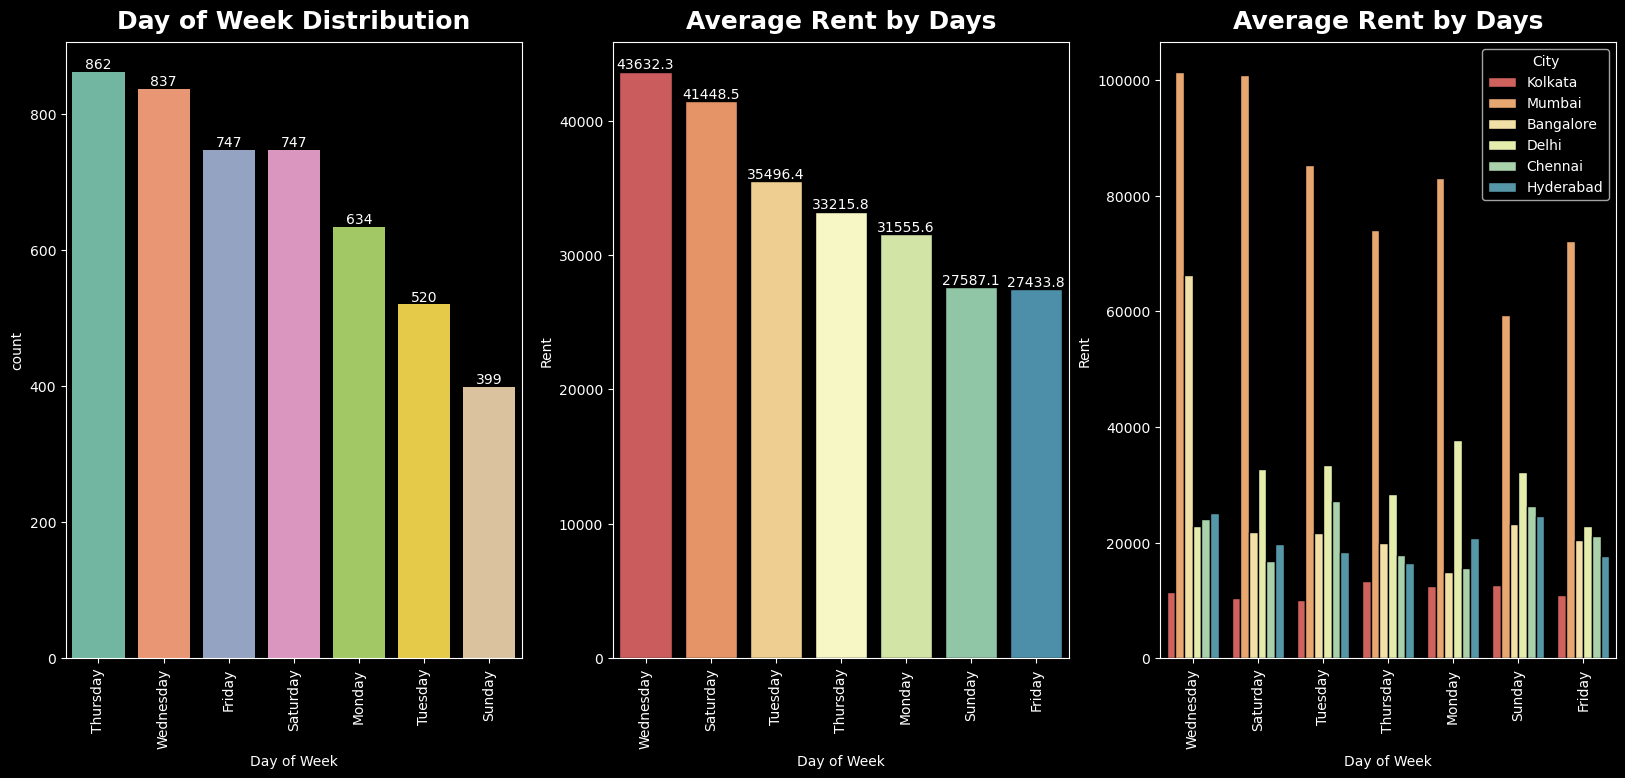

In [17]:
def categorical_visualization(cols):
    plt.figure(figsize=(20,8))
    plt.subplot(1,3,1)
    ax=sns.countplot(x=cols,data=df,palette="Set2",order=df[cols].value_counts().index)
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
    ax.bar_label(ax.containers[0])
    plt.title(f"{cols} Distribution",pad=10,fontweight="black",fontsize=18)
    plt.xticks(rotation=90)

  
    
    plt.subplot(1,3,2)
    df[cols].value_counts()
    cols_list = df.groupby(cols)["Rent"].mean().sort_values(ascending=False).index[0:].tolist()
    ax=sns.barplot(x = cols, y = 'Rent', data = df[df[cols].isin(cols_list)],
                    order = cols_list, 
                    palette = 'Spectral', 
                    ci = False,
                    edgecolor = "black")
    plt.xticks(rotation = 90);
    ax.bar_label(ax.containers[0])
    plt.title('Average Rent by Days',pad=10,fontweight="black",fontsize=18)
    





    
    plt.subplot(1,3,3)
    df[cols].value_counts()
    cols_list = df.groupby(cols)["Rent"].mean().sort_values(ascending=False).index[0:].tolist()
    ax=sns.barplot(x = cols, y = 'Rent', data = df[df[cols].isin(cols_list)],
                    order = cols_list, 
                    palette = 'Spectral', 
                    ci = False,
                   hue="City",
                    edgecolor = "black")
    plt.xticks(rotation = 90);
    #ax.bar_label(ax.containers[0])
    plt.title('Average Rent by Days',pad=10,fontweight="black",fontsize=18)
    plt.show()

categorical_visualization("Day of Week")

# Floor VS 6 FIGURES RENT

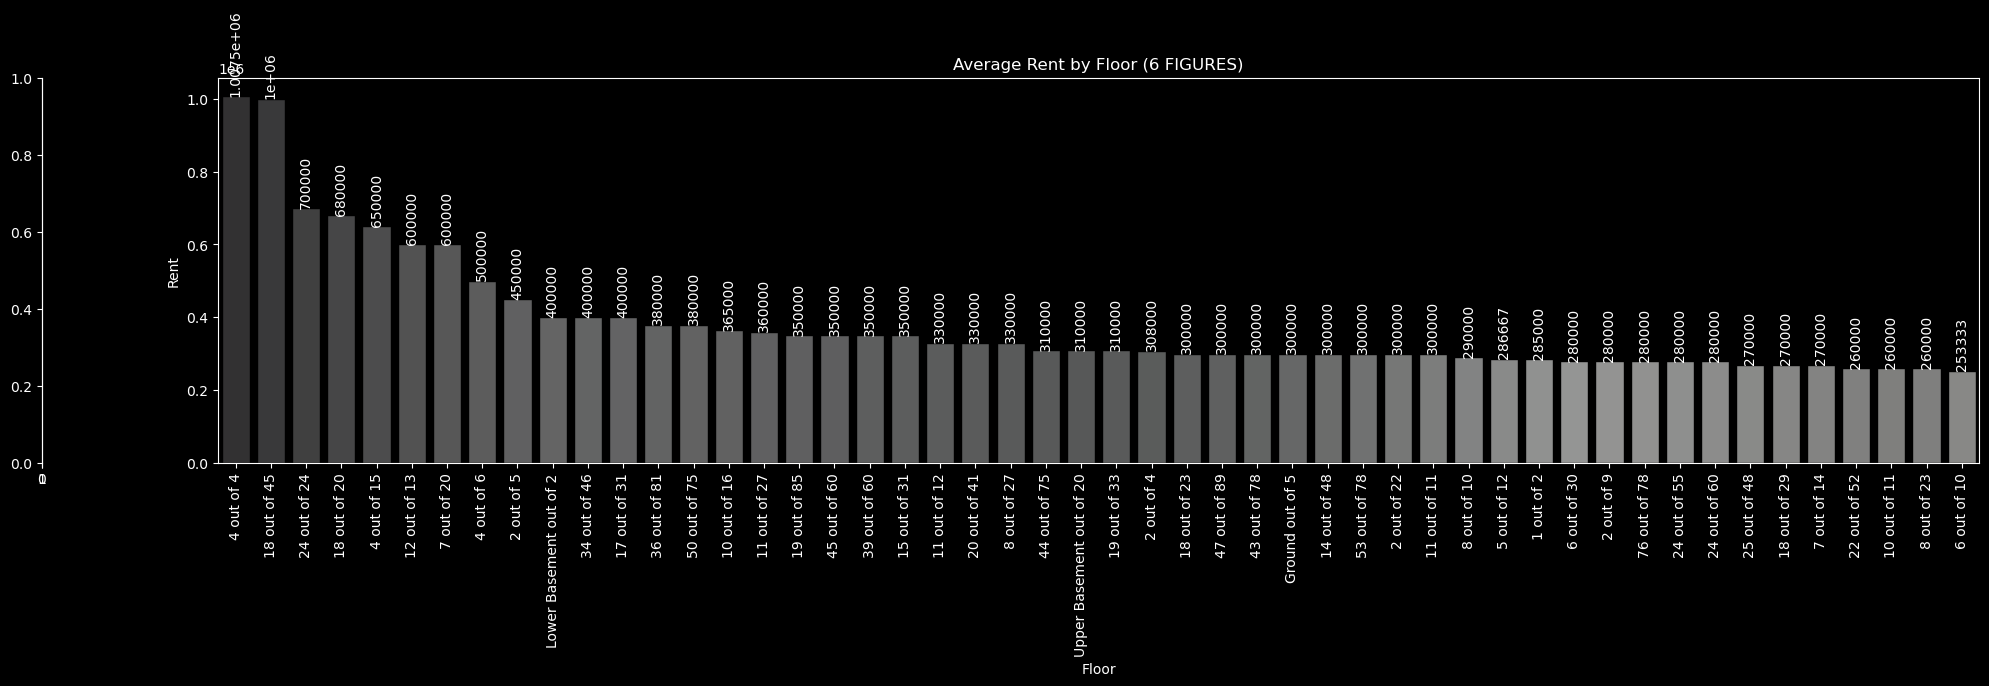

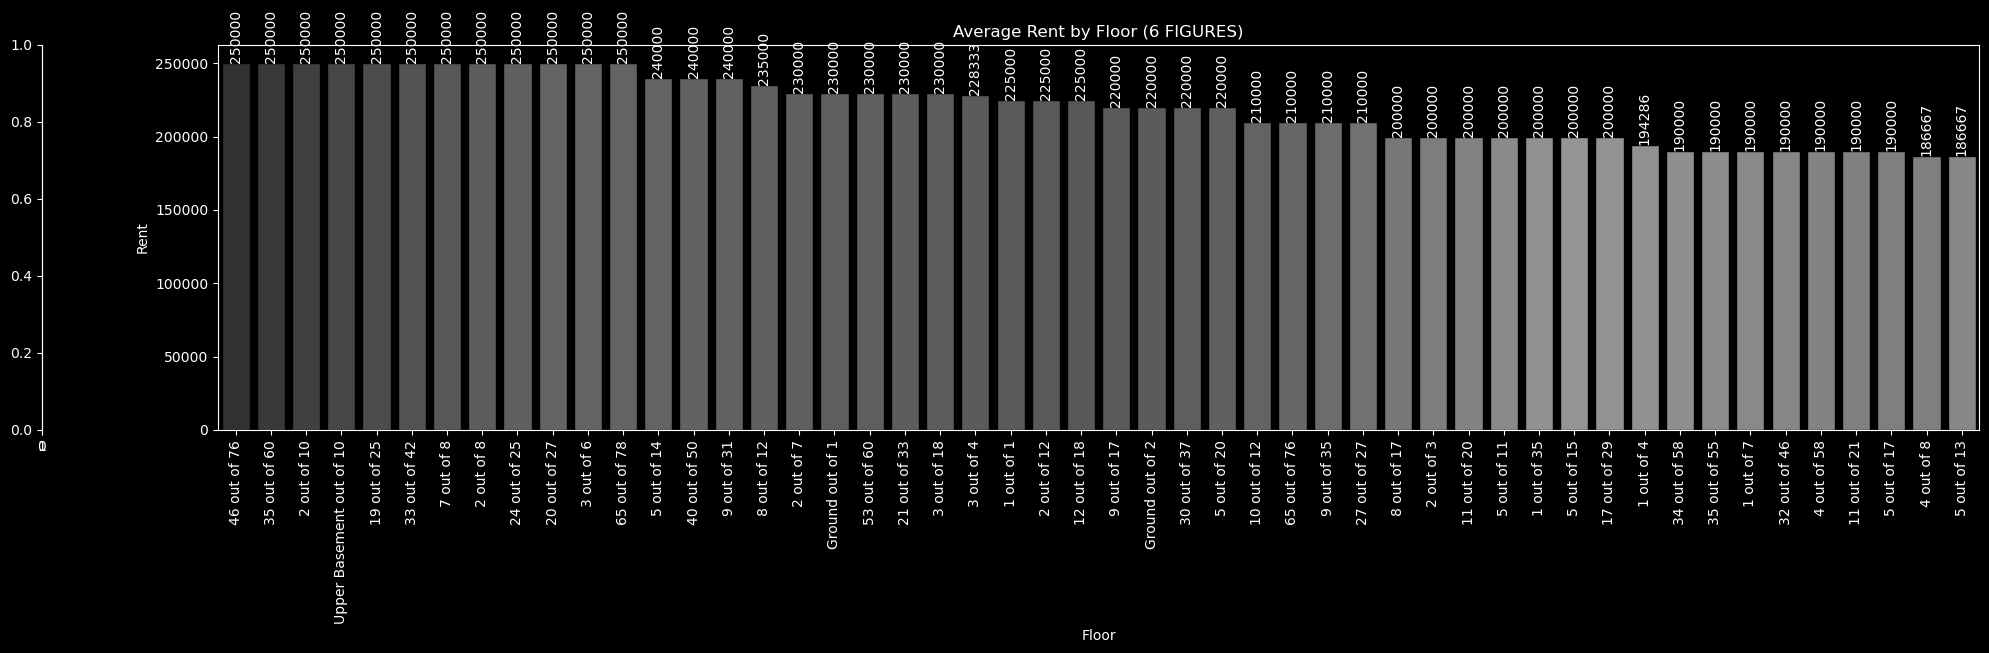

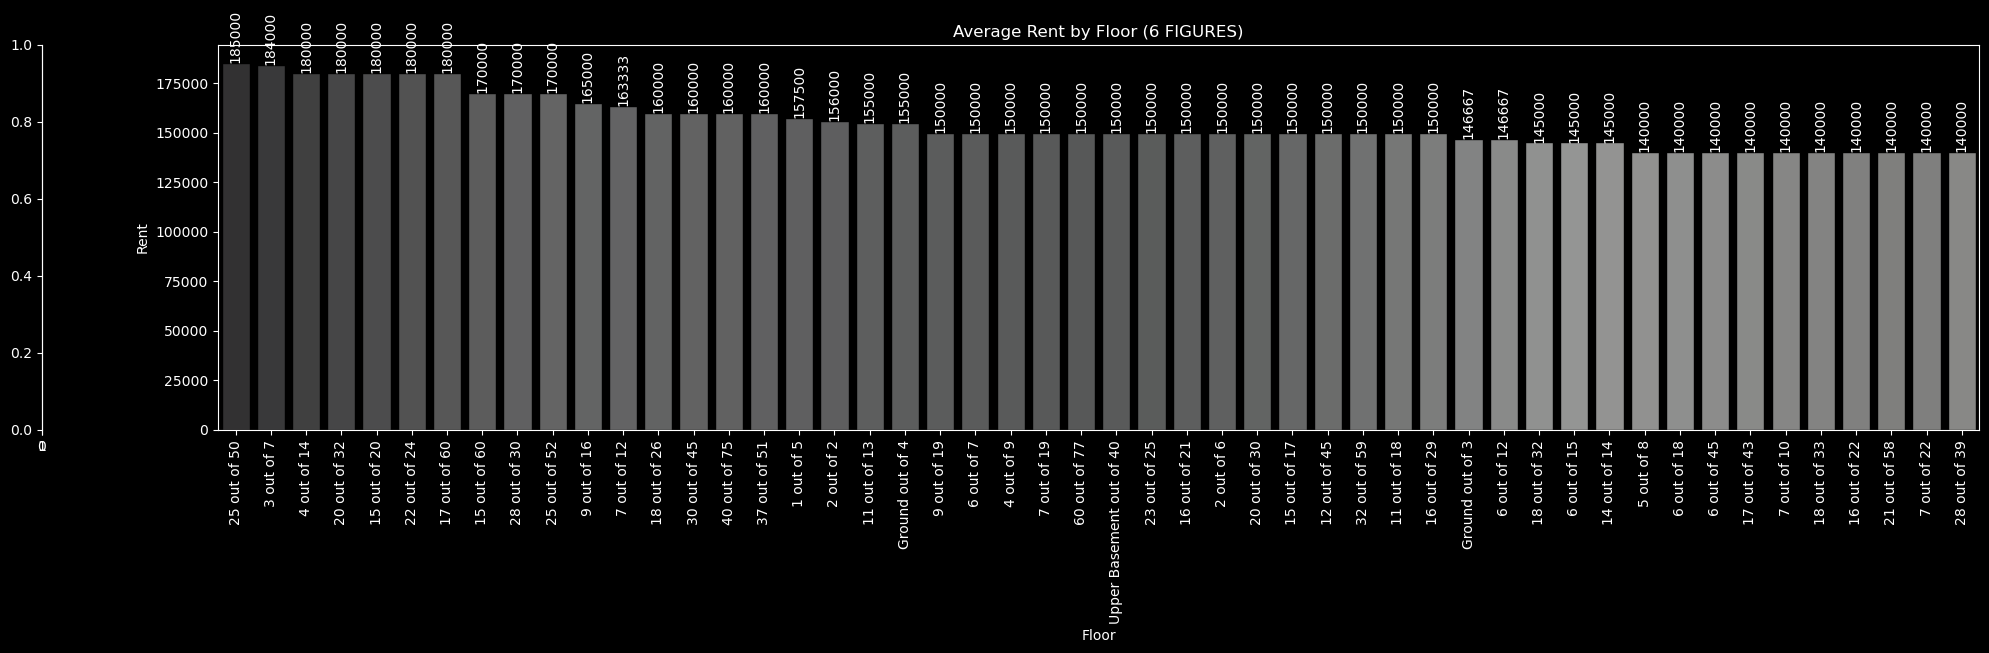

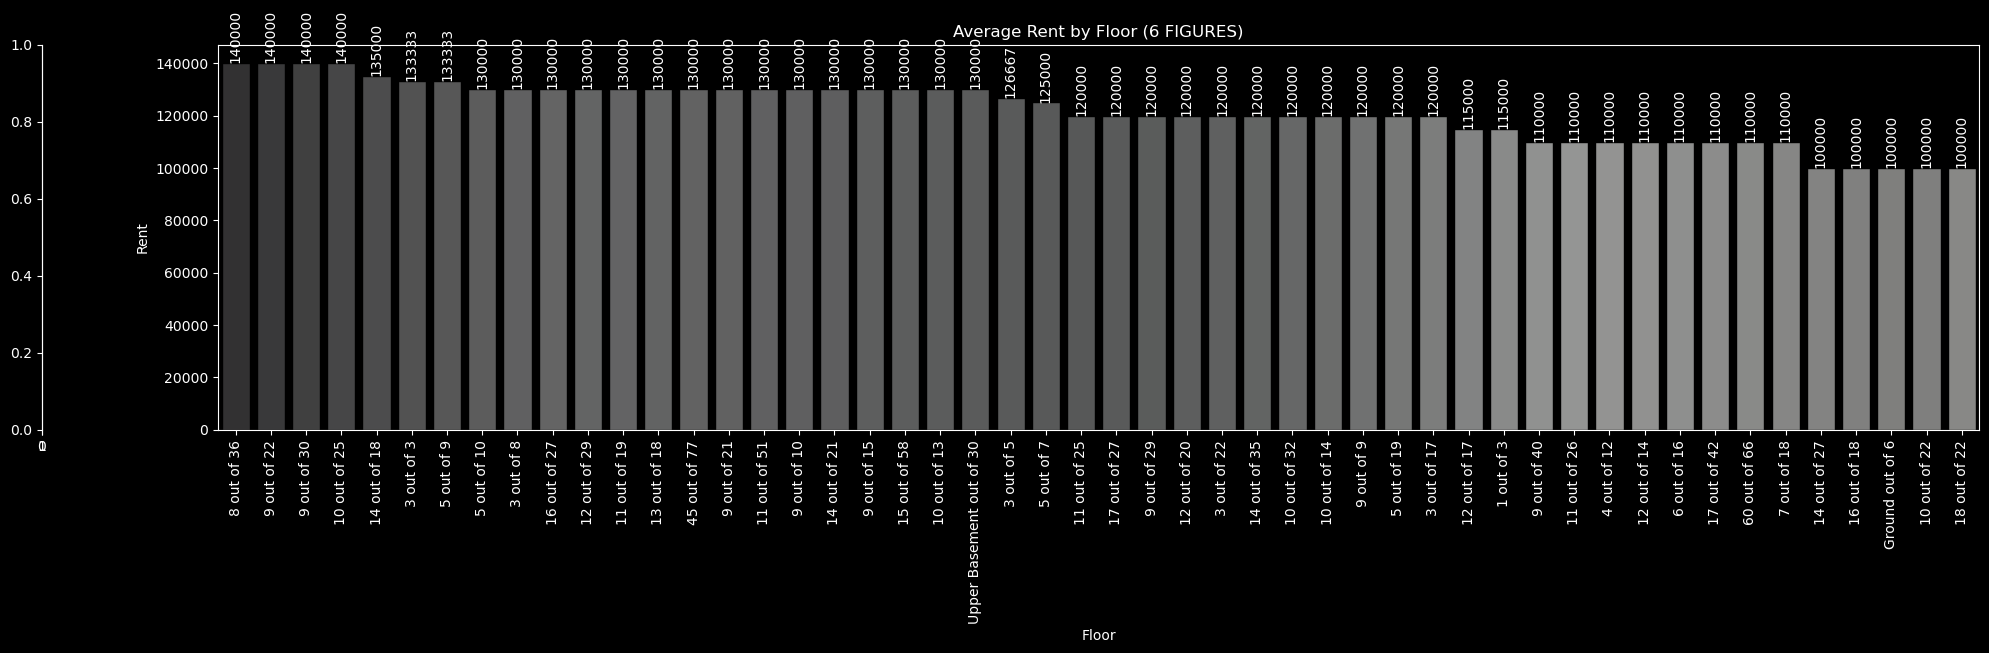

In [18]:
df1=df[df["Rent"]>=100000]

def new_viusal(col):
    #plt.subplot(1,2,1)
    plt.style.use('dark_background')
    #plt.subplot(1,2,2)
    cols_list = df1.groupby(col)["Rent"].mean().sort_values(ascending=False).index[0:50].tolist()
    fig, ax = plt.subplots (1, 2, gridspec_kw={'width_ratios': [0, 200]}, figsize=(25, 5))
    ax=sns.barplot(x =col, y = 'Rent', data = df1[df1[col].isin(cols_list)],
                        order = cols_list, 
                        palette = 'viridis', 
                        ci = False,
                        dodge=False,
                        saturation= 0.009,
                   errcolor='.16',

                        edgecolor = "black")
    plt.xticks(rotation = 90);
    ax.bar_label(ax.containers[0],rotation=90)
    plt.title('Average Rent by Floor (6 FIGURES)')
    #plt.show()


  
    

        
    #plt.subplot(1,2,2)
    cols_list = df1.groupby(col)["Rent"].mean().sort_values(ascending=False).index[50:100].tolist()
    fig, ax = plt.subplots (1, 2, gridspec_kw={'width_ratios': [0, 200]}, figsize=(25, 5))
    ax=sns.barplot(x =col, y = 'Rent', data = df1[df1[col].isin(cols_list)],
                        order = cols_list, 
                        palette = 'viridis', 
                        ci = False,
                        dodge=False,
                        saturation= 0.009,
                   errcolor='.16',

                        edgecolor = "black")
    plt.xticks(rotation = 90);
    ax.bar_label(ax.containers[0],rotation=90)
    plt.title('Average Rent by Floor (6 FIGURES)')
    #plt.show()
    
    
    
        
    cols_list = df1.groupby(col)["Rent"].mean().sort_values(ascending=False).index[100:150].tolist()
    fig, ax = plt.subplots (1, 2, gridspec_kw={'width_ratios': [0, 200]}, figsize=(25, 5))
    ax=sns.barplot(x =col, y = 'Rent', data = df1[df1[col].isin(cols_list)],
                        order = cols_list, 
                        palette = 'viridis', 
                        ci = False,
                        dodge=False,
                        saturation= 0.009,
                   errcolor='.16',

                        edgecolor = "black")
    plt.xticks(rotation = 90);
    ax.bar_label(ax.containers[0],rotation=90)
    plt.title('Average Rent by Floor (6 FIGURES)')
    #plt.show()
    
    cols_list = df1.groupby(col)["Rent"].mean().sort_values(ascending=False).index[150:200].tolist()
    fig, ax = plt.subplots (1, 2, gridspec_kw={'width_ratios': [0, 200]}, figsize=(25, 5))
    ax=sns.barplot(x =col, y = 'Rent', data = df1[df1[col].isin(cols_list)],
                        order = cols_list, 
                        palette = 'viridis', 
                        ci = False,
                        dodge=False,
                        saturation= 0.009,
                   errcolor='.16',

                        edgecolor = "black")
    plt.xticks(rotation = 90);
    ax.bar_label(ax.containers[0],rotation=90)
    plt.title('Average Rent by Floor (6 FIGURES)')
    plt.show()



new_viusal("Floor")



# FLOOR VS 5 FIGURES RENT

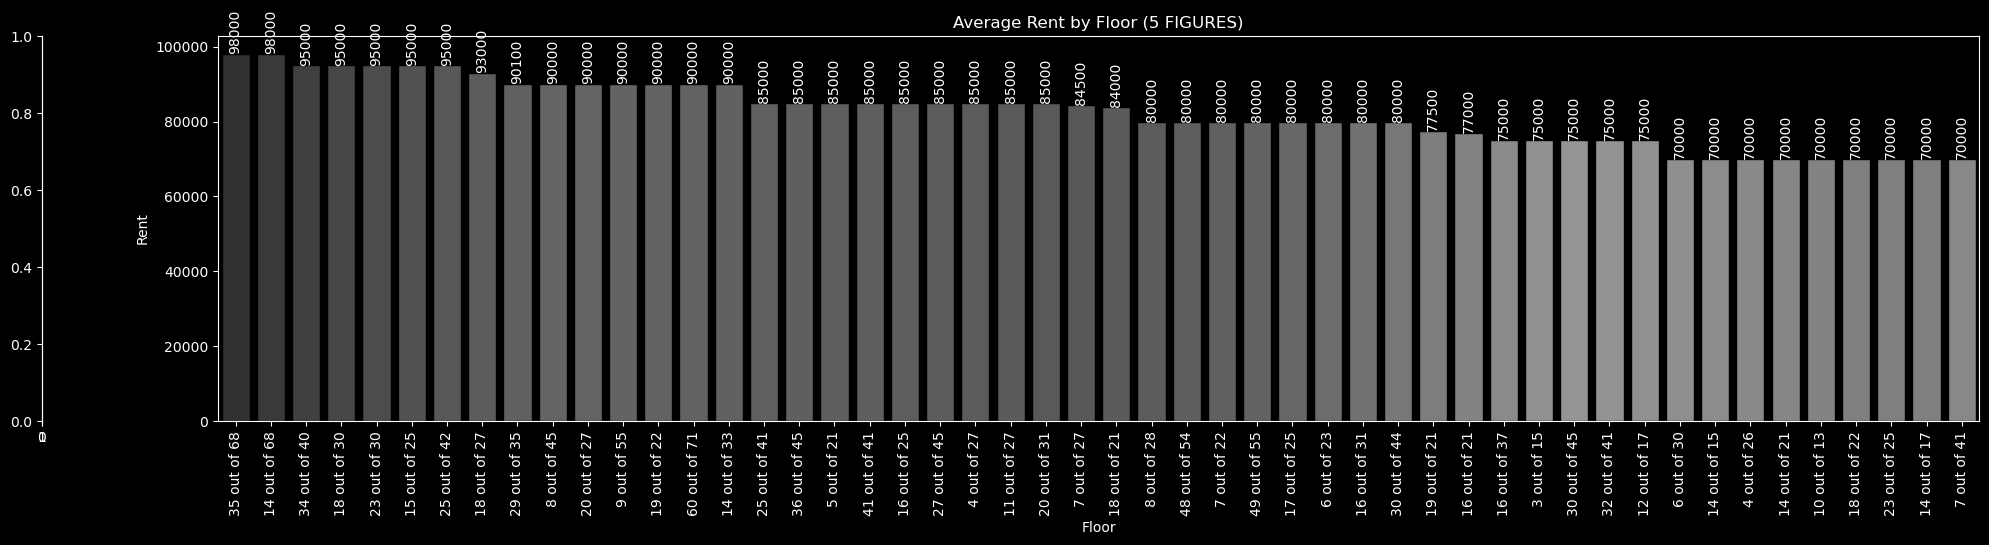

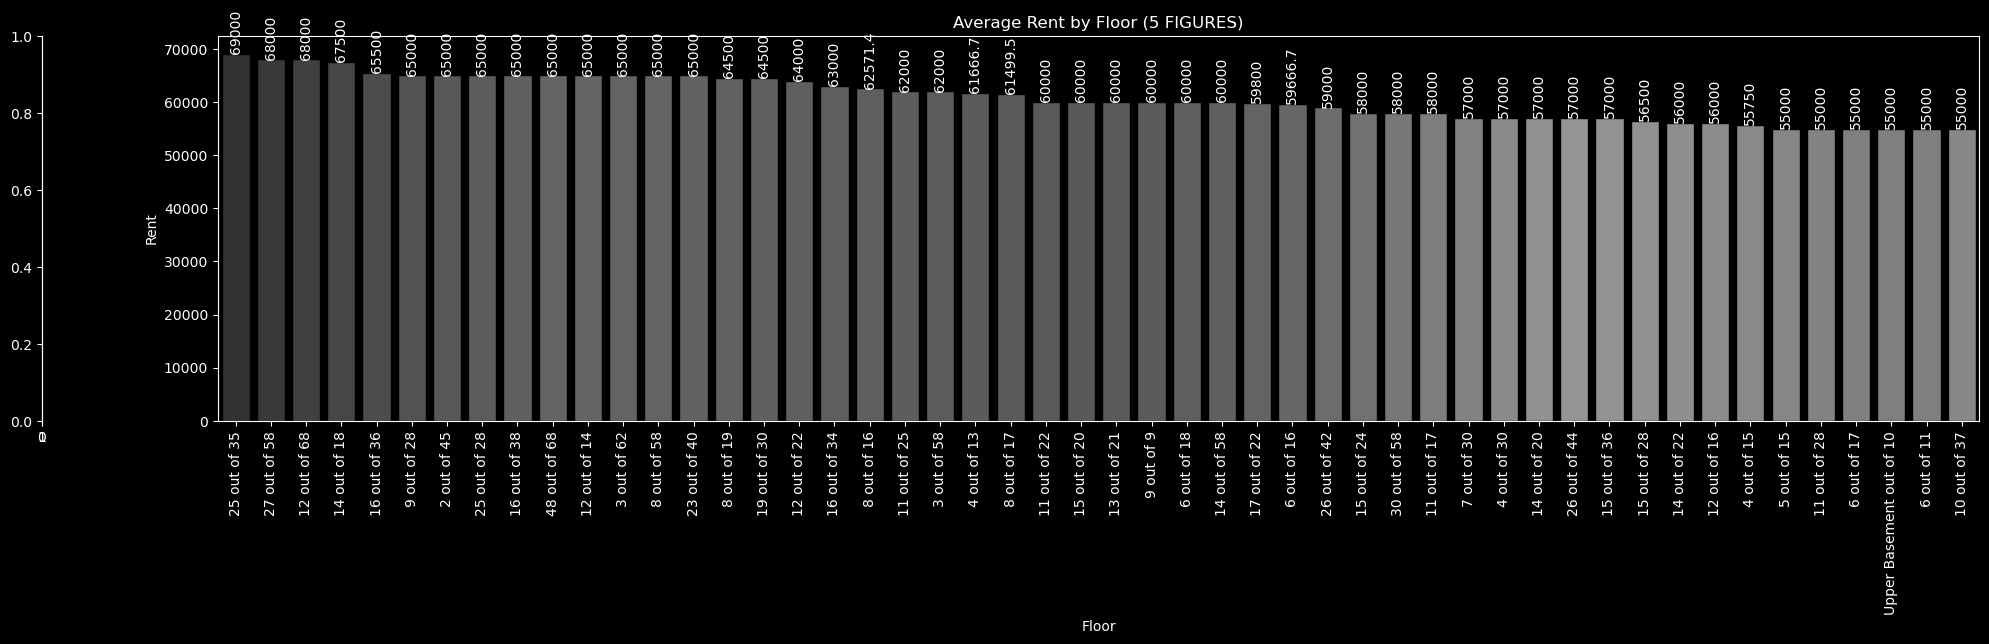

In [19]:
df2=df[(df["Rent"]<100000) & (df["Rent"]>1000) ]

def new_viusal(col):
    #plt.subplot(1,2,1)
    plt.style.use('dark_background')
    #plt.subplot(1,2,2)
    cols_list = df2.groupby(col)["Rent"].mean().sort_values(ascending=False).index[0:50].tolist()
    fig, ax = plt.subplots (1, 2, gridspec_kw={'width_ratios': [0, 200]}, figsize=(25, 5))
    ax=sns.barplot(x =col, y = 'Rent', data = df2[df2[col].isin(cols_list)],
                        order = cols_list, 
                        palette = 'viridis', 
                        ci = False,
                        dodge=False,
                        saturation= 0.009,
                   errcolor='.16',

                        edgecolor = "black")
    plt.xticks(rotation = 90);
    ax.bar_label(ax.containers[0],rotation=90)
    plt.title('Average Rent by Floor (5 FIGURES)')
    #plt.show()


  
    

        
    #plt.subplot(1,2,2)
    cols_list = df2.groupby(col)["Rent"].mean().sort_values(ascending=False).index[50:100].tolist()
    fig, ax = plt.subplots (1, 2, gridspec_kw={'width_ratios': [0, 200]}, figsize=(25, 5))
    ax=sns.barplot(x =col, y = 'Rent', data = df2[df2[col].isin(cols_list)],
                        order = cols_list, 
                        palette = 'viridis', 
                        ci = False,
                        dodge=False,
                        saturation= 0.009,
                   errcolor='.16',

                        edgecolor = "black")
    plt.xticks(rotation = 90);
    ax.bar_label(ax.containers[0],rotation=90)
    plt.title('Average Rent by Floor (5 FIGURES)')
    #plt.show()
    
    
    
    


new_viusal("Floor")



# Area Type

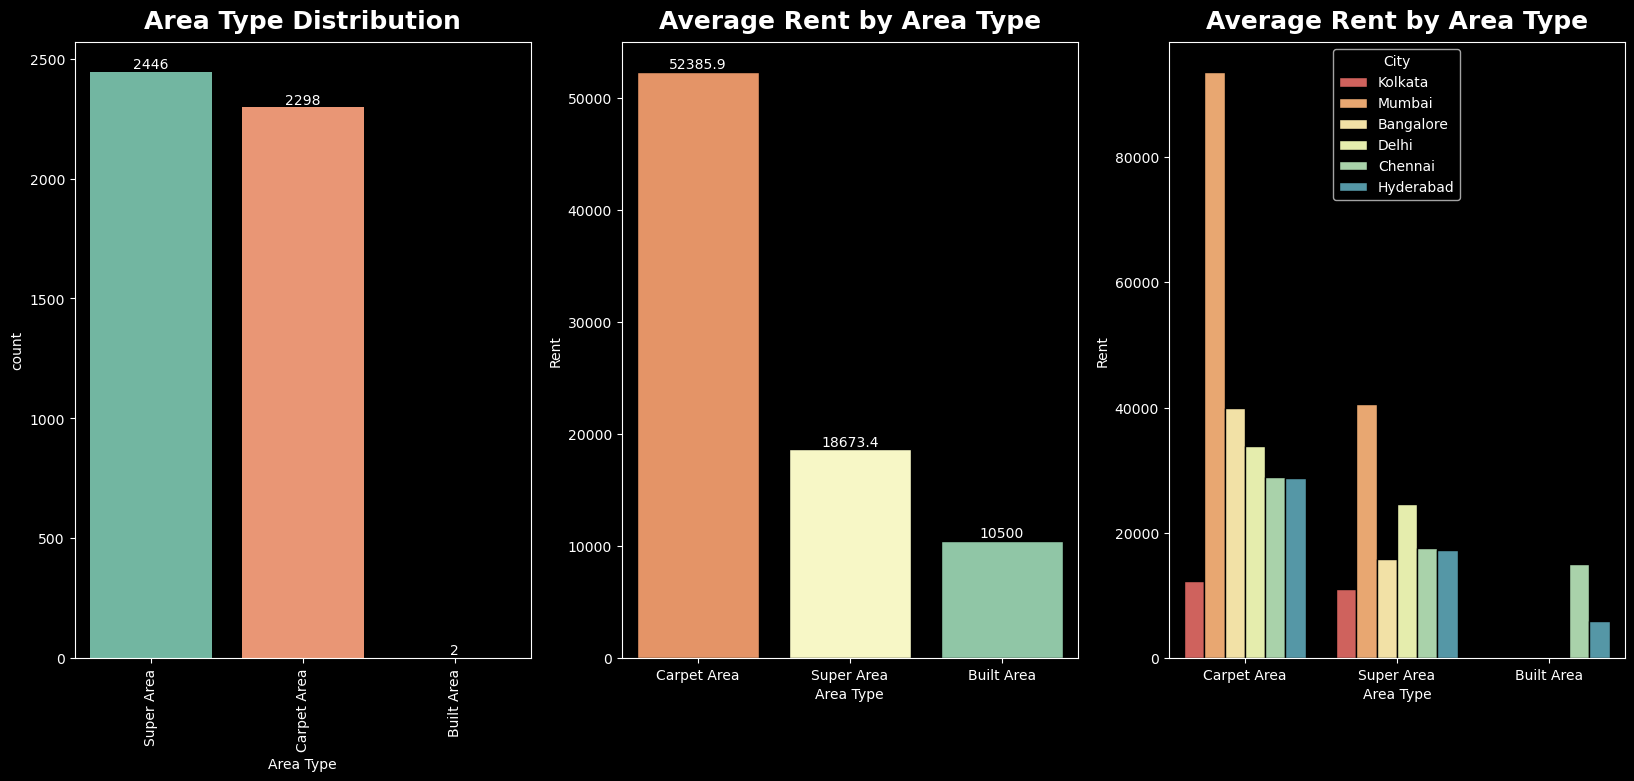

In [20]:
def categorical_visualization(cols):
    plt.figure(figsize=(20,8))
    plt.subplot(1,3,1)
    ax=sns.countplot(x=cols,data=df,palette="Set2",order=df[cols].value_counts().index)
    plt.title(f"{cols} Distribution",pad=10,fontweight="black",fontsize=18)
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
    ax.bar_label(ax.containers[0])
    plt.xticks(rotation=90)
    
    
    
    plt.subplot(1,3,2)
    df[cols].value_counts()
    cols_list = df.groupby(cols)["Rent"].mean().sort_values(ascending=False).index[0:].tolist()
    cols_list_sorted = sorted(cols_list)
    ax=sns.barplot(x = cols, y = 'Rent', data = df[df[cols].isin(cols_list)],
                    order = cols_list, 
                    palette = 'Spectral', 
                    ci = False,
                    edgecolor = "black")
    plt.xticks(rotation = 0);
    ax.bar_label(ax.containers[0])
    plt.title('Average Rent by Area Type',pad=10,fontweight="black",fontsize=18)
    





    
    plt.subplot(1,3,3)
    df[cols].value_counts()
    cols_list = df.groupby(cols)["Rent"].mean().sort_values(ascending=False).index[0:].tolist()
    cols_list_sorted = sorted(cols_list)
    ax=sns.barplot(x = cols, y = 'Rent', data = df[df[cols].isin(cols_list)],
                    order = cols_list, 
                    palette = 'Spectral', 
                    ci = False,
                   hue="City",
                    edgecolor = "black")
    plt.xticks(rotation = 0);
    #ax.bar_label(ax.containers[0])
    plt.title('Average Rent by Area Type',pad=10,fontweight="black",fontsize=18)
    plt.show()#July had the most increase in Ren
    plt.show()

categorical_visualization("Area Type")

# CITY

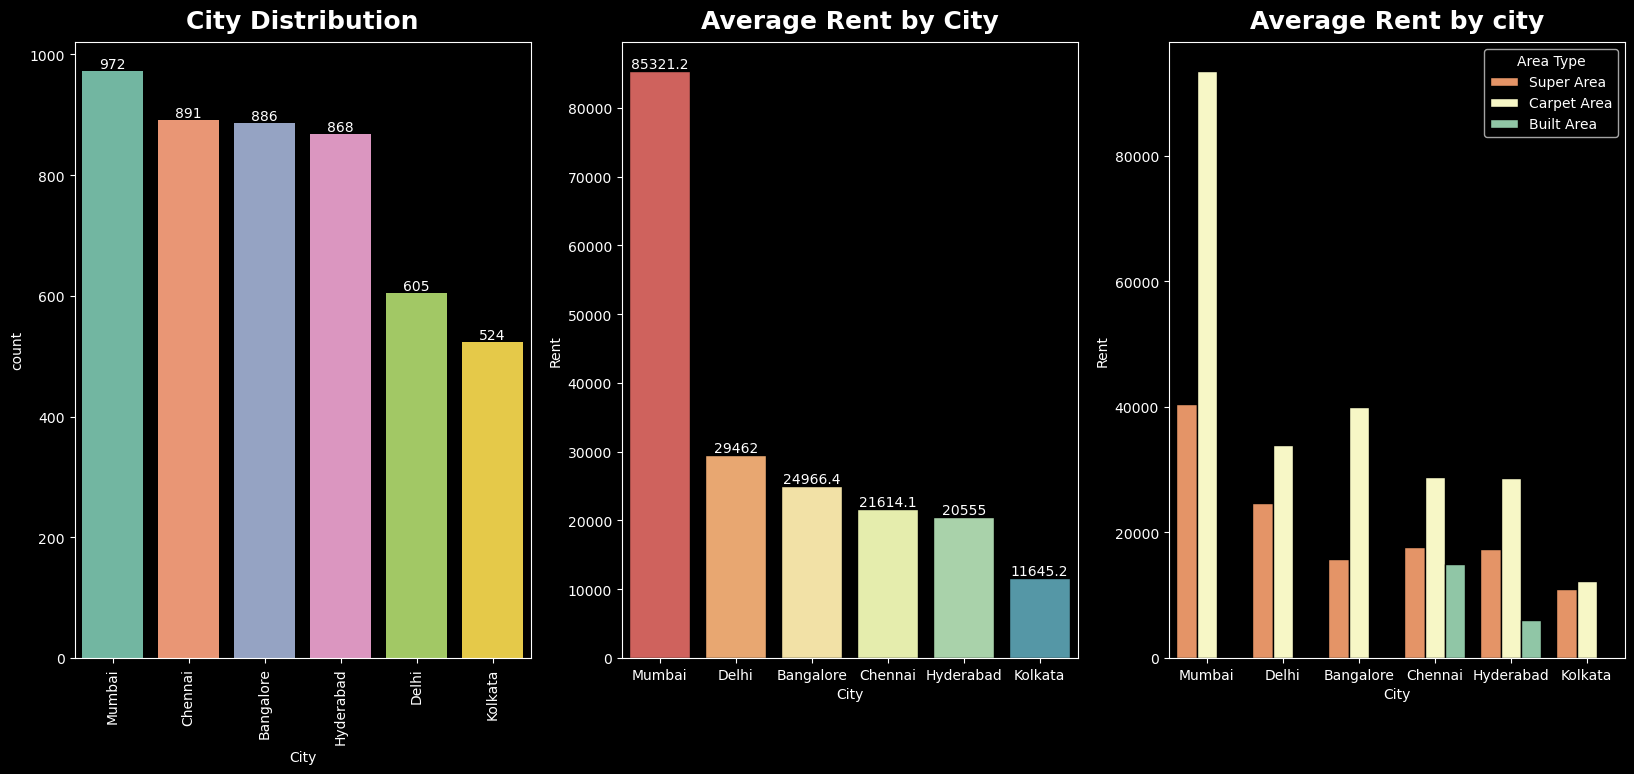

In [21]:
def categorical_visualization(cols):
    plt.figure(figsize=(20,8))
    plt.subplot(1,3,1)
    ax=sns.countplot(x=cols,data=df,palette="Set2",order=df[cols].value_counts().index)
    plt.title(f"{cols} Distribution",pad=10,fontweight="black",fontsize=18)
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
    ax.bar_label(ax.containers[0])
    plt.xticks(rotation=90)
    
   
    
    plt.subplot(1,3,2)
    df[cols].value_counts()
    cols_list = df.groupby(cols)["Rent"].mean().sort_values(ascending=False).index[0:].tolist()
    cols_list_sorted = sorted(cols_list)
    ax=sns.barplot(x = cols, y = 'Rent', data = df[df[cols].isin(cols_list)],
                    order = cols_list, 
                    palette = 'Spectral', 
                    ci = False,
                    edgecolor = "black")
    plt.xticks(rotation = 0);
    ax.bar_label(ax.containers[0])
    plt.title('Average Rent by City',pad=10,fontweight="black",fontsize=18)
    





    
    plt.subplot(1,3,3)
    df[cols].value_counts()
    cols_list = df.groupby(cols)["Rent"].mean().sort_values(ascending=False).index[0:].tolist()
    cols_list_sorted = sorted(cols_list)
    ax=sns.barplot(x = cols, y = 'Rent', data = df[df[cols].isin(cols_list)],
                    order = cols_list, 
                    palette = 'Spectral', 
                    ci = False,
                   hue="Area Type",
                    edgecolor = "black")
    plt.xticks(rotation = 0);
    #ax.bar_label(ax.containers[0])
    plt.title('Average Rent by city',pad=10,fontweight="black",fontsize=18)

categorical_visualization("City")

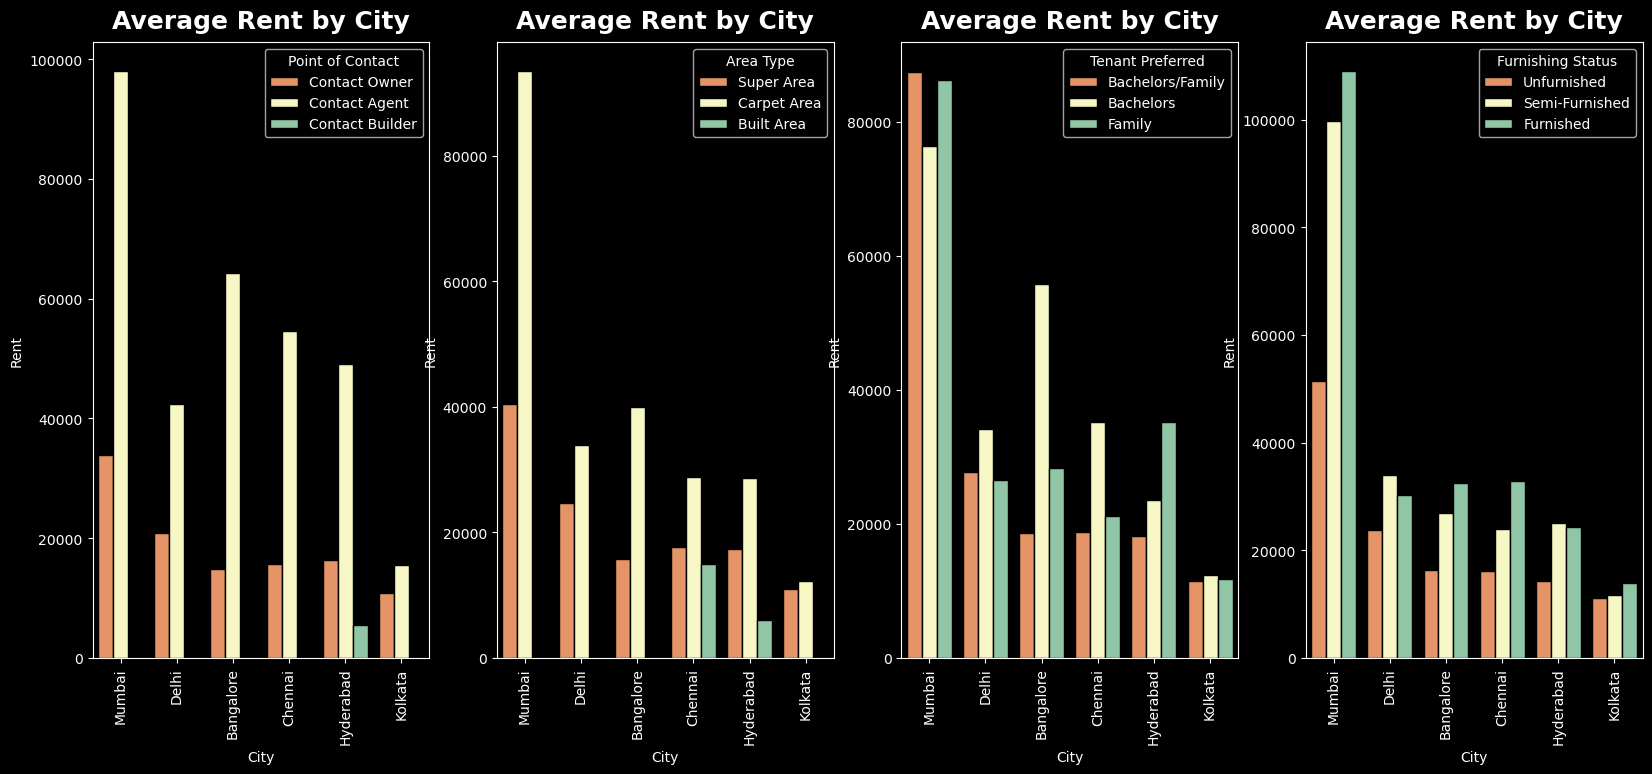

In [22]:
def categorical_visualization(cols):
    plt.figure(figsize=(20,8))
    plt.subplot(1,4,1)
    df[cols].value_counts()
    cols_list = df.groupby(cols)["Rent"].mean().sort_values(ascending=False).index[0:].tolist()
    cols_list_sorted = sorted(cols_list)
    ax=sns.barplot(x = cols, y = 'Rent', data = df[df[cols].isin(cols_list)],
                    order = cols_list, 
                    palette = 'Spectral', 
                    ci = False,
                   hue="Point of Contact",
                    edgecolor = "black")
    plt.xticks(rotation = 90);
    #ax.bar_label(ax.containers[0])
    plt.title('Average Rent by City',pad=10,fontweight="black",fontsize=18)
    
   
    
    plt.subplot(1,4,2)
    df[cols].value_counts()
    cols_list = df.groupby(cols)["Rent"].mean().sort_values(ascending=False).index[0:].tolist()
    cols_list_sorted = sorted(cols_list)
    ax=sns.barplot(x = cols, y = 'Rent', data = df[df[cols].isin(cols_list)],
                    order = cols_list, 
                    palette = 'Spectral', 
                    ci = False,
                   hue="Area Type",
                    edgecolor = "black")
    plt.xticks(rotation = 90);
    #ax.bar_label(ax.containers[0])
    plt.title('Average Rent by City',pad=10,fontweight="black",fontsize=18)
    





    
    plt.subplot(1,4,3)
    df[cols].value_counts()
    cols_list = df.groupby(cols)["Rent"].mean().sort_values(ascending=False).index[0:].tolist()
    cols_list_sorted = sorted(cols_list)
    ax=sns.barplot(x = cols, y = 'Rent', data = df[df[cols].isin(cols_list)],
                    order = cols_list, 
                    palette = 'Spectral', 
                    ci = False,
                   hue="Tenant Preferred",
                    edgecolor = "black")
    plt.xticks(rotation = 90);
   # ax.bar_label(ax.containers[0])
    plt.title('Average Rent by City',pad=10,fontweight="black",fontsize=18)
    
    plt.subplot(1,4,4)
    df[cols].value_counts()
    cols_list = df.groupby(cols)["Rent"].mean().sort_values(ascending=False).index[0:].tolist()
    cols_list_sorted = sorted(cols_list)
    ax=sns.barplot(x = cols, y = 'Rent', data = df[df[cols].isin(cols_list)],
                    order = cols_list, 
                    palette = 'Spectral', 
                    ci = False,
                 
                   hue="Furnishing Status",
                    edgecolor = "black")
    plt.xticks(rotation = 90);
    #ax.bar_label(ax.containers[0])
    plt.title('Average Rent by City',pad=10,fontweight="black",fontsize=18)
    

    
    plt.show()

categorical_visualization("City")

# Furnishing Status

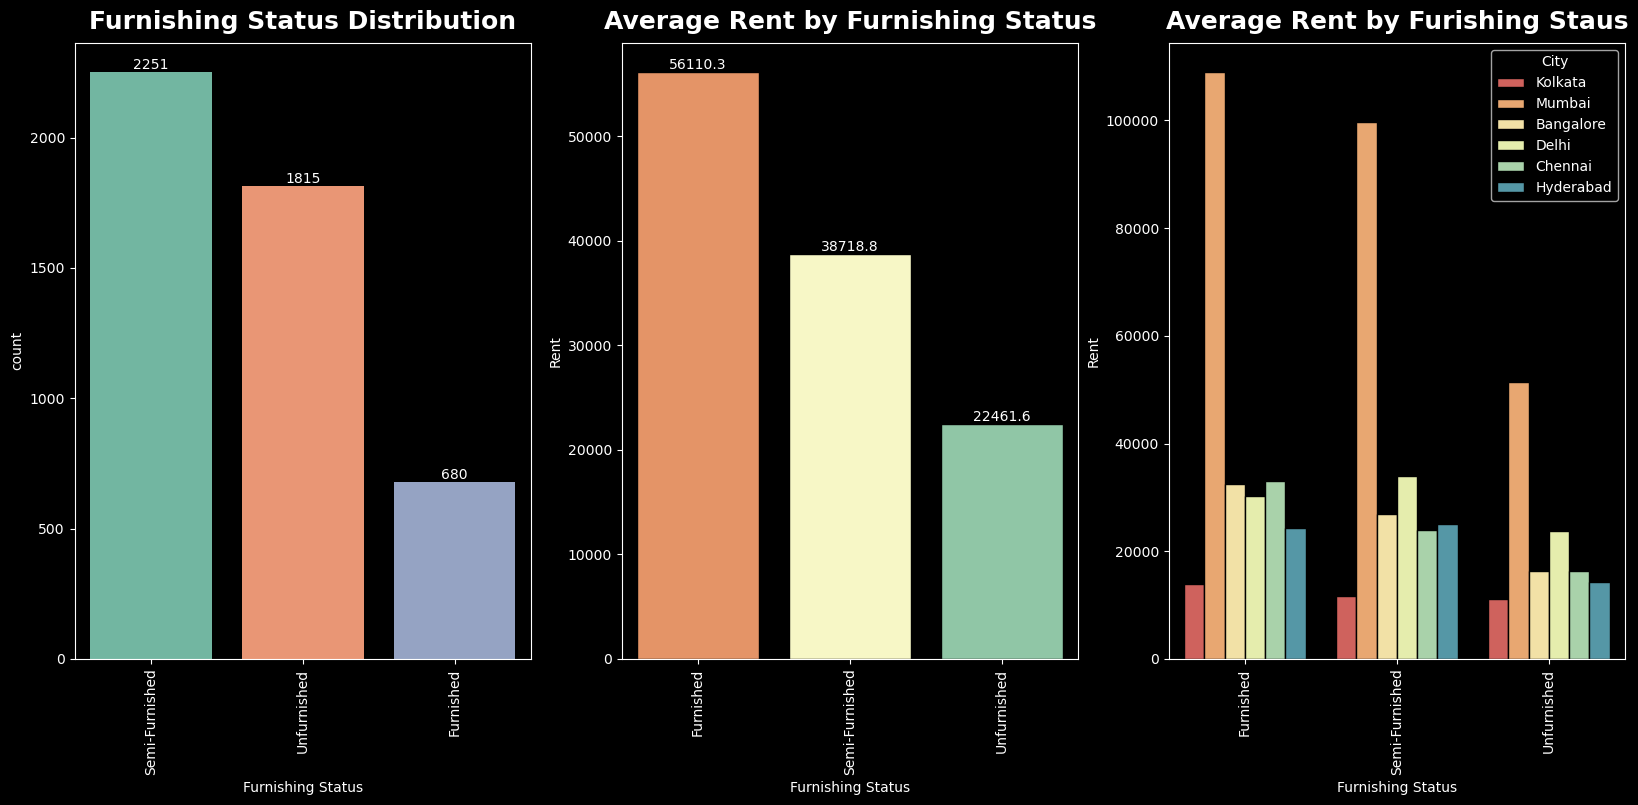

In [23]:
def categorical_visualization(cols):
    plt.figure(figsize=(20,8))
    plt.subplot(1,3,1)
    ax=sns.countplot(x=cols,data=df,palette="Set2",order=df[cols].value_counts().index)
    plt.title(f"{cols} Distribution",pad=10,fontweight="black",fontsize=18)
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
    ax.bar_label(ax.containers[0])
    plt.xticks(rotation=90)
    
   
    
    plt.subplot(1,3,2)
    df[cols].value_counts()
    cols_list = df.groupby(cols)["Rent"].mean().sort_values(ascending=False).index[0:].tolist()
    cols_list_sorted = sorted(cols_list)
    ax=sns.barplot(x = cols, y = 'Rent', data = df[df[cols].isin(cols_list)],
                    order = cols_list, 
                    palette = 'Spectral', 
                    ci = False,
                    edgecolor = "black")
    plt.xticks(rotation = 90);
    ax.bar_label(ax.containers[0])
    plt.title('Average Rent by Furnishing Status',pad=10,fontweight="black",fontsize=18)
    





    
    plt.subplot(1,3,3)
    df[cols].value_counts()
    cols_list = df.groupby(cols)["Rent"].mean().sort_values(ascending=False).index[0:].tolist()
    cols_list_sorted = sorted(cols_list)
    ax=sns.barplot(x = cols, y = 'Rent', data = df[df[cols].isin(cols_list)],
                    order = cols_list, 
                    palette = 'Spectral', 
                    ci = False,
                   hue="City",
                    edgecolor = "black")
    plt.xticks(rotation = 90);
    #ax.bar_label(ax.containers[0])
    plt.title('Average Rent by Furishing Staus', pad=10,fontweight="black",fontsize=18)
    plt.show()

categorical_visualization("Furnishing Status")

# Tenant Preferred

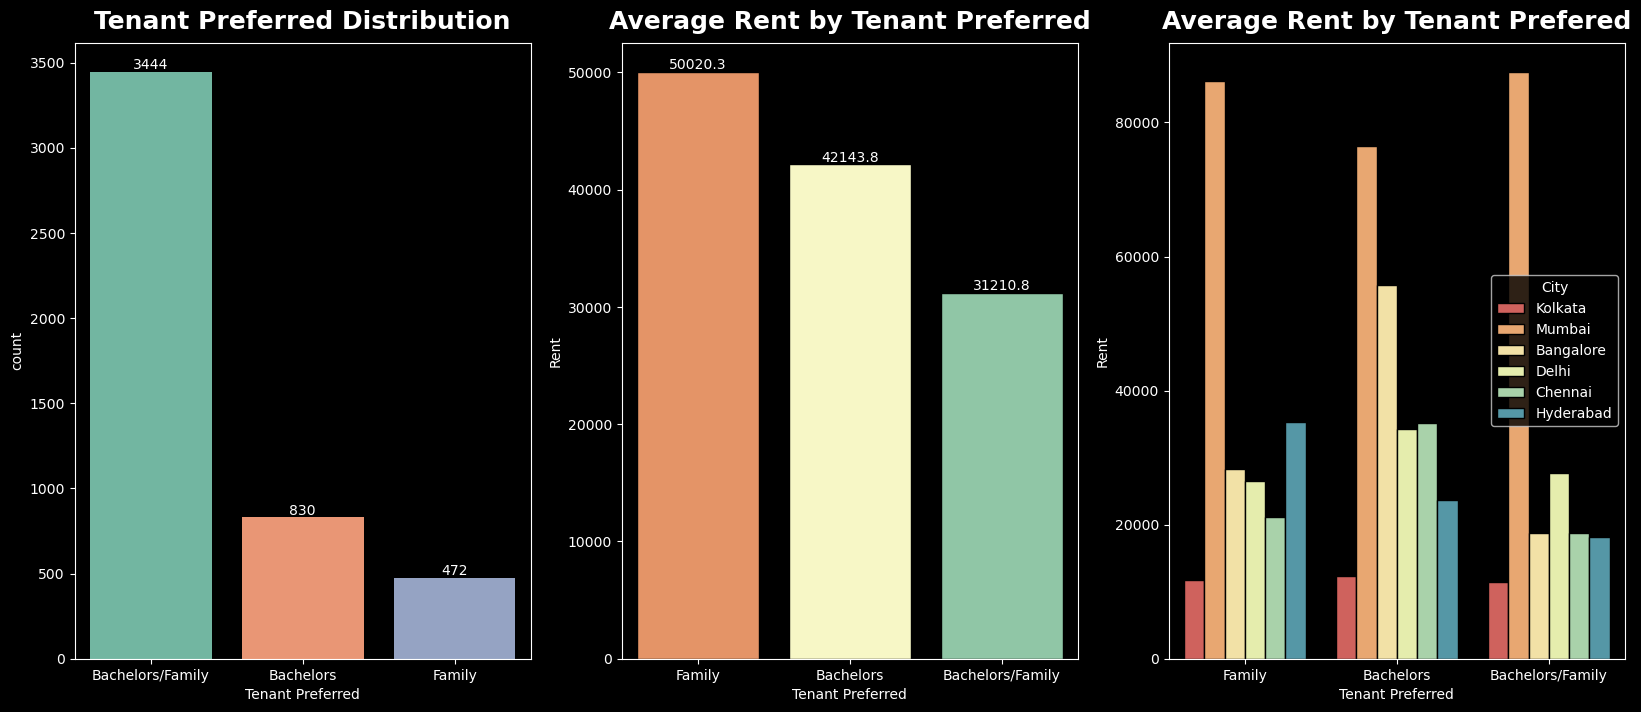

In [24]:
def categorical_visualization(cols):
    plt.figure(figsize=(20,8))
    plt.subplot(1,3,1)
    ax=sns.countplot(x=cols,data=df,palette="Set2",order=df[cols].value_counts().index)
    plt.title(f"{cols} Distribution",pad=10,fontweight="black",fontsize=18)
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
    ax.bar_label(ax.containers[0])
    plt.xticks(rotation=0)
    
   
    
    plt.subplot(1,3,2)
    df[cols].value_counts()
    cols_list = df.groupby(cols)["Rent"].mean().sort_values(ascending=False).index[0:].tolist()
    cols_list_sorted = sorted(cols_list)
    ax=sns.barplot(x = cols, y = 'Rent', data = df[df[cols].isin(cols_list)],
                    order = cols_list, 
                    palette = 'Spectral', 
                    ci = False,
                    edgecolor = "black")
    plt.xticks(rotation = 0);
    ax.bar_label(ax.containers[0])
    plt.title('Average Rent by Tenant Preferred',pad=10,fontweight="black",fontsize=18)
    





    
    plt.subplot(1,3,3)
    df[cols].value_counts()
    cols_list = df.groupby(cols)["Rent"].mean().sort_values(ascending=False).index[0:].tolist()
    cols_list_sorted = sorted(cols_list)
    ax=sns.barplot(x = cols, y = 'Rent', data = df[df[cols].isin(cols_list)],
                    order = cols_list, 
                    palette = 'Spectral', 
                    ci = False,
                   hue="City",
                    edgecolor = "black")
    plt.xticks(rotation = 0);
    #ax.bar_label(ax.containers[0])
    plt.title('Average Rent by Tenant Prefered',pad=10,fontweight="black",fontsize=18)
    plt.show()

categorical_visualization("Tenant Preferred")

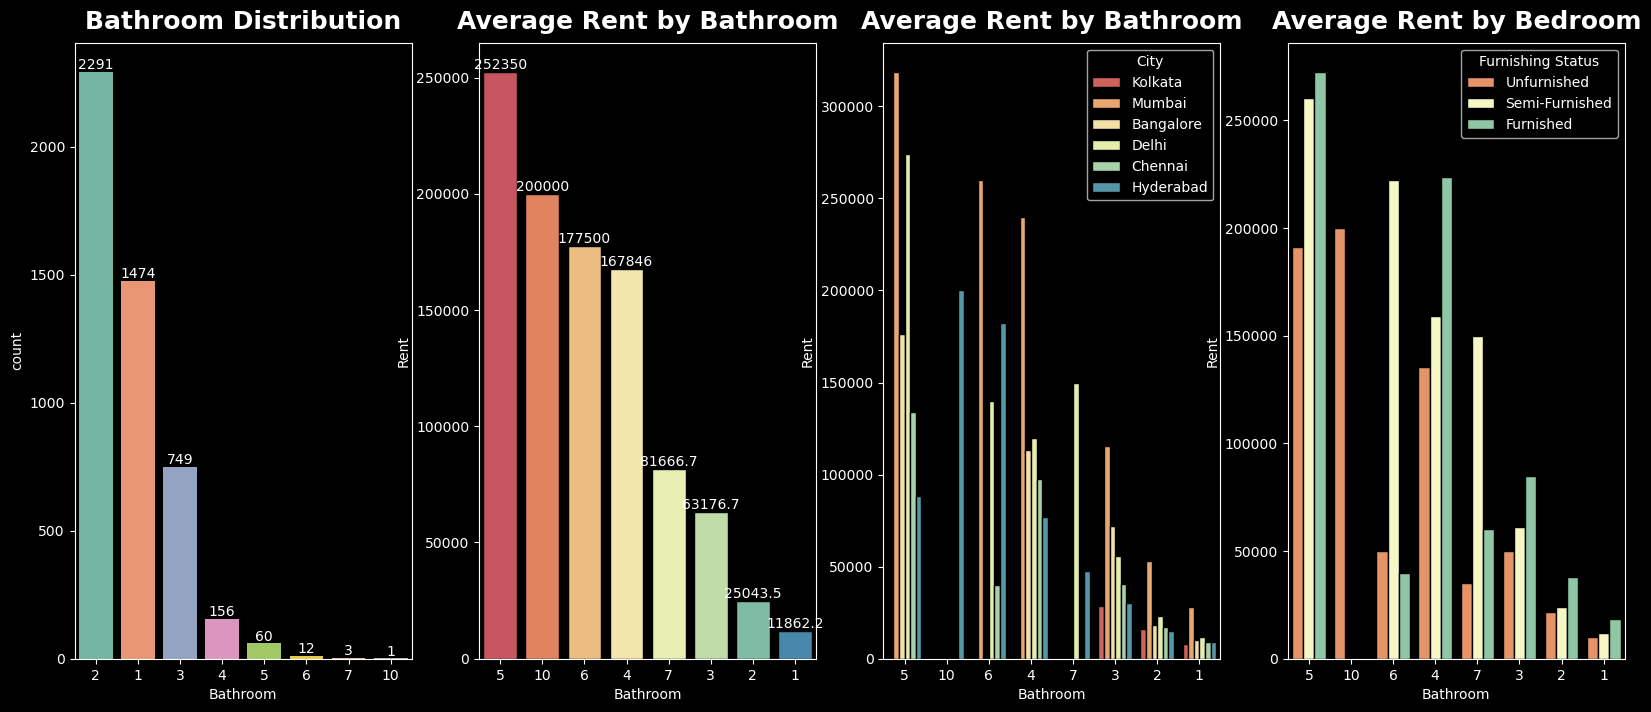

In [25]:
def categorical_visualization(cols):
    plt.figure(figsize=(20,8))
    plt.subplot(1,4,1)
    ax=sns.countplot(x=cols,data=df,palette="Set2",order=df[cols].value_counts().index)
    plt.title(f"{cols} Distribution",pad=10,fontweight="black",fontsize=18)
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
    ax.bar_label(ax.containers[0])
    plt.xticks(rotation=0)
    
   
    
    plt.subplot(1,4,2)
    df[cols].value_counts()
    cols_list = df.groupby(cols)["Rent"].mean().sort_values(ascending=False).index[0:].tolist()
    cols_list_sorted = sorted(cols_list)
    ax=sns.barplot(x = cols, y = 'Rent', data = df[df[cols].isin(cols_list)],
                    order = cols_list, 
                    palette = 'Spectral', 
                    ci = False,
                    edgecolor = "black")
    plt.xticks(rotation = 0);
    ax.bar_label(ax.containers[0])
    plt.title('Average Rent by Bathroom',pad=10,fontweight="black",fontsize=18)
    





    
    plt.subplot(1,4,3)
    df[cols].value_counts()
    cols_list = df.groupby(cols)["Rent"].mean().sort_values(ascending=False).index[0:].tolist()
    cols_list_sorted = sorted(cols_list)
    ax=sns.barplot(x = cols, y = 'Rent', data = df[df[cols].isin(cols_list)],
                    order = cols_list, 
                    palette = 'Spectral', 
                    ci = False,
                   hue="City",
                    edgecolor = "black")
    plt.xticks(rotation = 0);
    #ax.bar_label(ax.containers[0])
    plt.title('Average Rent by Bathroom',pad=10,fontweight="black",fontsize=18)
    
    
    
    plt.subplot(1,4,4)
    df[cols].value_counts()
    cols_list = df.groupby(cols)["Rent"].mean().sort_values(ascending=False).index[0:].tolist()
    cols_list_sorted = sorted(cols_list)
    ax=sns.barplot(x = cols, y = 'Rent', data = df[df[cols].isin(cols_list)],
                    order = cols_list, 
                    palette = 'Spectral', 
                    ci = False,
                   hue="Furnishing Status",
                    edgecolor = "black")
    plt.xticks(rotation = 0);
    #ax.bar_label(ax.containers[0])
    plt.title('Average Rent by Bedroom',pad=10,fontweight="black",fontsize=18)
    plt.show()

categorical_visualization("Bathroom")

# Point of Contact

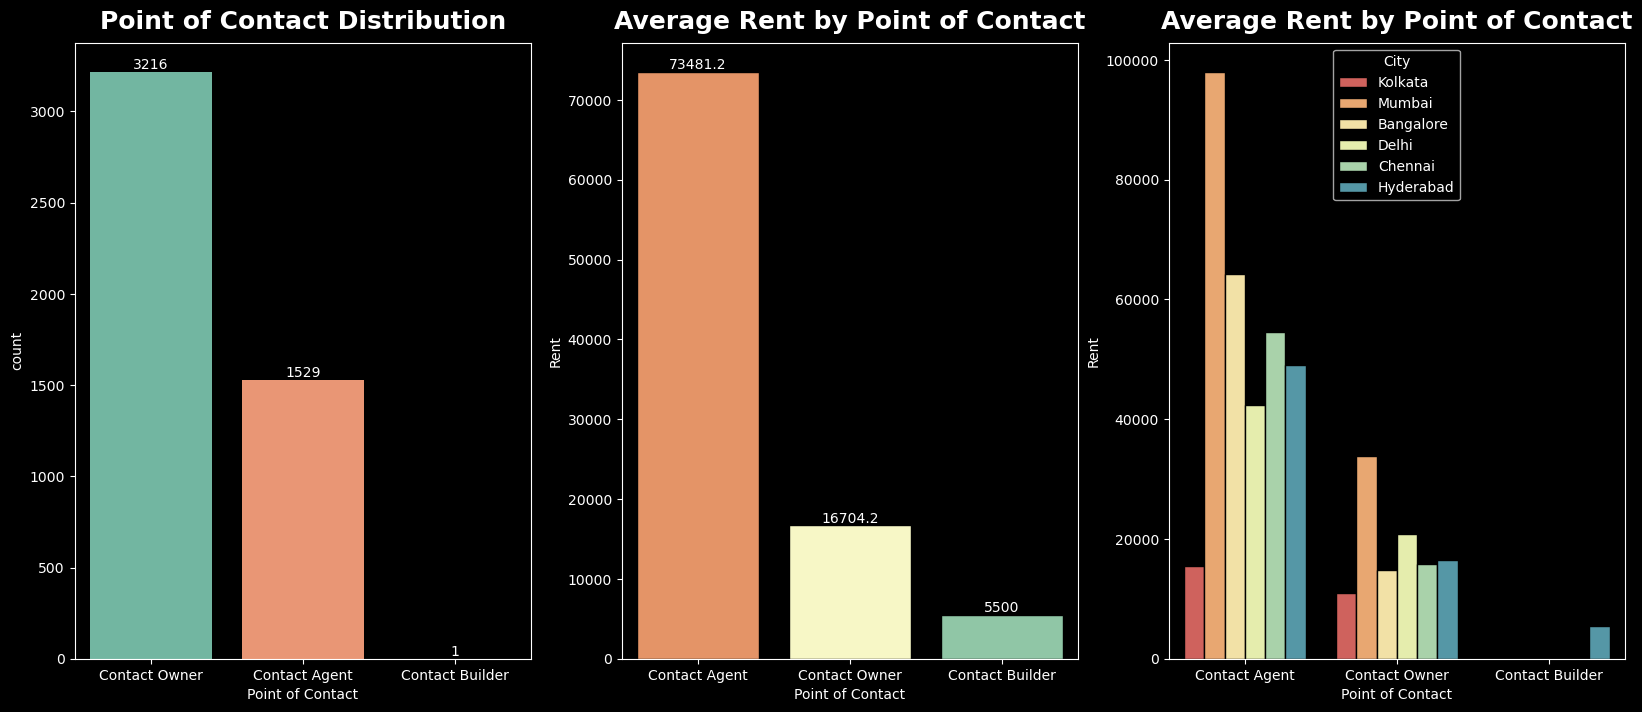

In [26]:
def categorical_visualization(cols):
    plt.figure(figsize=(20,8))
    plt.subplot(1,3,1)
    ax=sns.countplot(x=cols,data=df,palette="Set2",order=df[cols].value_counts().index)
    plt.title(f"{cols} Distribution",pad=10,fontweight="black",fontsize=18)
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
    ax.bar_label(ax.containers[0])
    plt.xticks(rotation=0)
    
   
    
    plt.subplot(1,3,2)
    df[cols].value_counts()
    cols_list = df.groupby(cols)["Rent"].mean().sort_values(ascending=False).index[0:].tolist()
    cols_list_sorted = sorted(cols_list)
    ax=sns.barplot(x = cols, y = 'Rent', data = df[df[cols].isin(cols_list)],
                    order = cols_list, 
                    palette = 'Spectral', 
                    ci = False,
                    edgecolor = "black")
    plt.xticks(rotation = 0);
    ax.bar_label(ax.containers[0])
    plt.title('Average Rent by Point of Contact',pad=10,fontweight="black",fontsize=18)
    





    
    plt.subplot(1,3,3)
    df[cols].value_counts()
    cols_list = df.groupby(cols)["Rent"].mean().sort_values(ascending=False).index[0:].tolist()
    cols_list_sorted = sorted(cols_list)
    ax=sns.barplot(x = cols, y = 'Rent', data = df[df[cols].isin(cols_list)],
                    order = cols_list, 
                    palette = 'Spectral', 
                    ci = False,
                   hue="City",
                    edgecolor = "black")
    plt.xticks(rotation = 0);
    #ax.bar_label(ax.containers[0])
    plt.title('Average Rent by Point of Contact',pad=10,fontweight="black",fontsize=18)
    plt.show()

categorical_visualization("Point of Contact")

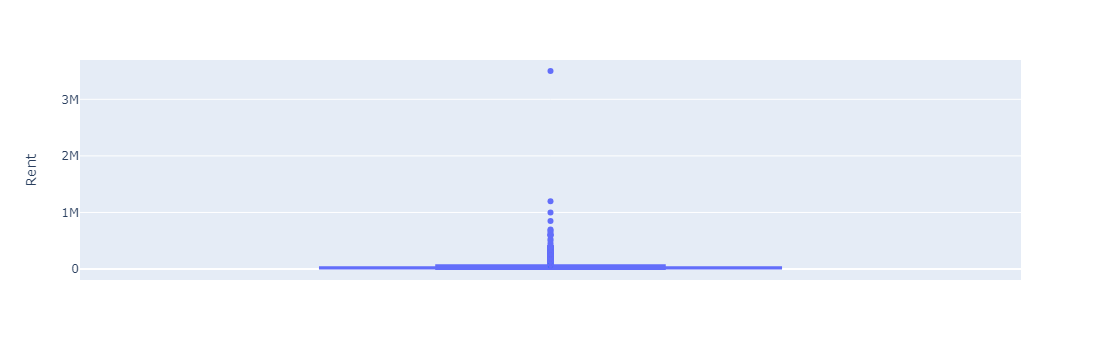

In [27]:
import plotly.express as px
fig = px.box(df, y = 'Rent')
fig.show()

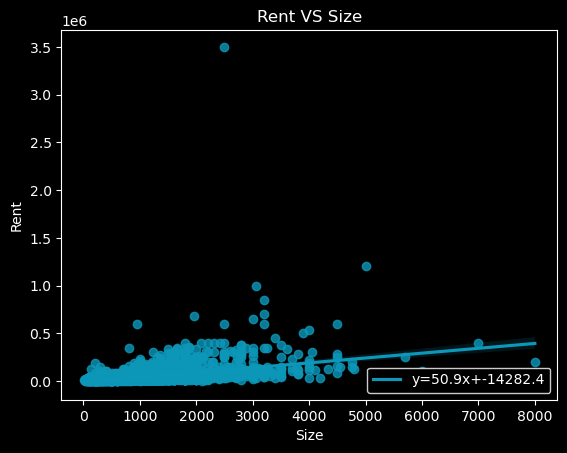

In [28]:
def lr_plot(df, col_x, col_y, leg):
    slope, intercept, r_value, p_value, std_err = stats.linregress(df[col_x],df[col_y])
    sns.regplot(x = col_x, y = col_y, data = df, color='#0d98ba', line_kws = {'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
    plt.legend(loc = leg, ncol = 1, fancybox = True, shadow = True, frameon = True)
    plt.title(col_y + ' VS ' + col_x)
    plt.show()

    return slope, intercept
slope, intercept = lr_plot(df,'Size','Rent', 'lower right')

In [44]:


df2.head()

Posted On  BHK     Rent    Size            Floor    Area Type  \
0 2022-05-18    2  10000.0  1100.0  Ground out of 2   Super Area   
1 2022-05-13    2  20000.0   800.0       1 out of 3   Super Area   
2 2022-05-16    2  17000.0  1000.0       1 out of 3   Super Area   
3 2022-07-04    2  10000.0   800.0       1 out of 2   Super Area   
4 2022-05-09    2   7500.0   850.0       1 out of 2  Carpet Area   

              Area Locality     City Furnishing Status  Tenant Preferred  \
0                    Bandel  Kolkata       Unfurnished  Bachelors/Family   
1  Phool Bagan, Kankurgachi  Kolkata    Semi-Furnished  Bachelors/Family   
2   Salt Lake City Sector 2  Kolkata    Semi-Furnished  Bachelors/Family   
3               Dumdum Park  Kolkata       Unfurnished  Bachelors/Family   
4             South Dum Dum  Kolkata       Unfurnished         Bachelors   

   Bathroom Point of Contact  Total no of floors Floor_on Day of Week Month  
0         2    Contact Owner                   2  Ground    Wednesday   May  
1         1    Contact Owner                   3       1       Friday   May  
2         1    Contact Owner                   3       1       Monday   May  
3         1    Contact Owner                   2       1       Monday  July  
4         1    Contact Owner                   2       1       Monday   May

In [45]:
def outlier_cap(df):
    df2=df.copy()
    numerical_cols=["Rent","Size"]
    for col in numerical_cols:
        q1=np.percentile(df2[col],25)
        q3=np.percentile(df2[col],75)
        iqr=q3-q1
        lower=q1-1.5*iqr
        upper=q3+1.5*iqr
        df2[col]=np.where(df2[col]<lower,lower,df2[col])
        df2[col]=np.where(df2[col]>upper,upper,df2[col])
    return df2
df2=outlier_cap(df)
        

# Model building

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import ARDRegression
from sklearn.linear_model import Lars
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.model_selection import cross_val_predict
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import ElasticNet
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.preprocessing import PolynomialFeatures
    
poly=PolynomialFeatures(degree=3)    
linear=LinearRegression()
lm=LabelEncoder()
standard=StandardScaler()
alpha = 1.0  # Regularization strength
ridge_model = Ridge(alpha=alpha)
alpha = 0.1  # Regularization strength
lasso_model = Lasso(alpha=alpha)
bayesian_ridge = BayesianRidge()
ard_regression = ARDRegression()
lars = Lars()
omp = OrthogonalMatchingPursuit(n_nonzero_coefs=5) 
passive_aggressive_regressor = PassiveAggressiveRegressor(C=1.0, max_iter=1000, random_state=42)
dt_regressor = DecisionTreeRegressor(random_state=0)
ran=RandomForestRegressor(n_estimators=20)

gradient=GradientBoostingRegressor(learning_rate=0.1,n_estimators=10)
hist=HistGradientBoostingRegressor(learning_rate=0.1,l2_regularization=0.1)
ada=AdaBoostRegressor(n_estimators=10,learning_rate=0.2,random_state=40)
knn=KNeighborsRegressor(n_neighbors=10)
el=ElasticNet(alpha=0.1)

In [47]:
df2["Total_rooms"]=df2["BHK"]+df2["Bathroom"]

In [49]:
df2

Posted On  BHK     Rent    Size            Floor    Area Type  \
0    2022-05-18    2  10000.0  1100.0  Ground out of 2   Super Area   
1    2022-05-13    2  20000.0   800.0       1 out of 3   Super Area   
2    2022-05-16    2  17000.0  1000.0       1 out of 3   Super Area   
3    2022-07-04    2  10000.0   800.0       1 out of 2   Super Area   
4    2022-05-09    2   7500.0   850.0       1 out of 2  Carpet Area   
...         ...  ...      ...     ...              ...          ...   
4741 2022-05-18    2  15000.0  1000.0       3 out of 5  Carpet Area   
4742 2022-05-15    3  29000.0  2000.0       1 out of 4   Super Area   
4743 2022-07-10    3  35000.0  1750.0       3 out of 5  Carpet Area   
4744 2022-07-06    3  45000.0  1500.0     23 out of 34  Carpet Area   
4745 2022-05-04    2  15000.0  1000.0       4 out of 5  Carpet Area   

                 Area Locality       City Furnishing Status  Tenant Preferred  \
0                       Bandel    Kolkata       Unfurnished  Bachelors/Family   
1     Phool Bagan, Kankurgachi    Kolkata    Semi-Furnished  Bachelors/Family   
2      Salt Lake City Sector 2    Kolkata    Semi-Furnished  Bachelors/Family   
3                  Dumdum Park    Kolkata       Unfurnished  Bachelors/Family   
4                South Dum Dum    Kolkata       Unfurnished         Bachelors   
...                        ...        ...               ...               ...   
4741              Bandam Kommu  Hyderabad    Semi-Furnished  Bachelors/Family   
4742      Manikonda, Hyderabad  Hyderabad    Semi-Furnished  Bachelors/Family   
4743      Himayath Nagar, NH 7  Hyderabad    Semi-Furnished  Bachelors/Family   
4744                Gachibowli  Hyderabad    Semi-Furnished            Family   
4745           Suchitra Circle  Hyderabad       Unfurnished         Bachelors   

      Bathroom Point of Contact  Total no of floors Floor_on Day of Week  \
0            2    Contact Owner                   2  Ground    Wednesday   
1            1    Contact Owner                   3       1       Friday   
2            1    Contact Owner                   3       1       Monday   
3            1    Contact Owner                   2       1       Monday   
4            1    Contact Owner                   2       1       Monday   
...        ...              ...                 ...      ...         ...   
4741         2    Contact Owner                   5       3    Wednesday   
4742         3    Contact Owner                   4       1       Sunday   
4743         3    Contact Agent                   5       3       Sunday   
4744         2    Contact Agent                  34      23    Wednesday   
4745         2    Contact Owner                   5       4    Wednesday   

     Month  Total_rooms  
0      May            4  
1      May            3  
2      May            3  
3     July            3  
4      May            3  
...    ...          ...  
4741   May            4  
4742   May            6  
4743  July            6  
4744  July            5  
4745   May            4  

[4746 rows x 17 columns]

In [50]:

num_to_encode=["Point of Contact","Floor","Area Type","Area Locality",
               "City","Furnishing Status","Tenant Preferred","Day of Week",
               "Month","Floor_on"]
pd.get_dummies(df2,num_to_encode,drop_first=True)
for cols in num_to_encode:
    df2[cols]=lm.fit_transform(df2[cols])
#df2.head()
x=df2.drop(["Rent","Posted On","BHK","Bathroom"],axis=1)
y=df2["Rent"]
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=50,test_size=0.5)
x_train=standard.fit_transform(x_train)
x_test=standard.transform(x_test)

In [52]:
def get_score(model):
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    score=model.score(x_test,y_test)
    return score*100

print("These are the accuracy scores for the Testing data  \n")
print(f' For Linear Regression Algorithm, we had an accuracy of {get_score(linear)}')
print(f' For  Ridge Algorithm, we had an accuracy of {get_score(ridge_model)}')
print(f' For Lasso Regression Algorithm, we had an accuracy of {get_score(lasso_model)}')
print(f' For Bayesian Algorithm, we had an accuracy of {get_score(bayesian_ridge)}')
print(f' For ARDRegression Algorithm, we had an accuracy of {get_score(ard_regression)}')
print(f' For Lars Algorithm, we had an accuracy of {get_score(lars)}')
print(f' For  Orthogonal Matching Pursuit Algorithm, we had an accuracy of {get_score(omp)}')
print(f' For Passive Aggression Regressor Algorithm, we had an accuracy of {get_score(passive_aggressive_regressor)}')
print(f' For Decision TreeRegressor Algorithm, we had an accuracy of {get_score(dt_regressor)}')
print(f' For Random Forest Regressor Algorithm, we had an accuracy of {get_score(ran)}')


print(f' For Gradient Boost Regressor Algorithm, we had an accuracy of {get_score(gradient)}')
print(f' For Hist Regressor Algorithm, we had an accuracy of {get_score(hist)}')
print(f' For Adaboost Forest Regressor Algorithm, we had an accuracy of {get_score(ada)}')
print(f' For KNN Regressor Algorithm, we had an accuracy of {get_score(knn)}')
print(f' For Elastic Net Algorithm, we had an accuracy of {get_score(el)}')


These are the accuracy scores for the Testing data  

 For Linear Regression Algorithm, we had an accuracy of 69.40468825074086
 For  Ridge Algorithm, we had an accuracy of 69.40482708439745
 For Lasso Regression Algorithm, we had an accuracy of 69.40482994342314
 For Bayesian Algorithm, we had an accuracy of 69.40499030541324
 For ARDRegression Algorithm, we had an accuracy of 69.42336879583158
 For Lars Algorithm, we had an accuracy of 69.40468825074086
 For  Orthogonal Matching Pursuit Algorithm, we had an accuracy of 69.07251558224256
 For Passive Aggression Regressor Algorithm, we had an accuracy of 67.68043706749806
 For Decision TreeRegressor Algorithm, we had an accuracy of 65.86767460264265
 For Random Forest Regressor Algorithm, we had an accuracy of 81.4289648851761
 For Gradient Boost Regressor Algorithm, we had an accuracy of 65.25329641666998
 For Hist Regressor Algorithm, we had an accuracy of 82.8551030030457
 For Adaboost Forest Regressor Algorithm, we had an accuracy 

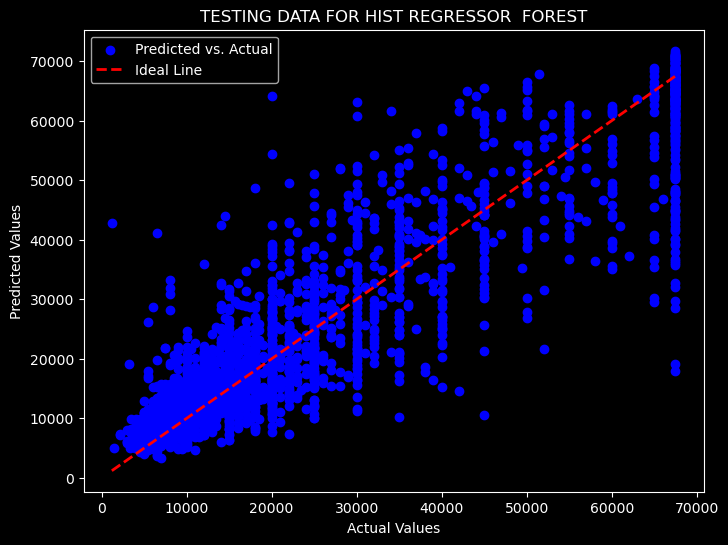

In [53]:

hist.fit(x_train,y_train)
pred=hist.predict(x_test)
plt.figure(figsize=(8, 6))
plt.scatter(y_test,pred, color='b', label='Predicted vs. Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label='Ideal Line')
# Set labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title("TESTING DATA FOR HIST REGRESSOR  FOREST")
plt.legend()